# **Bangkok Airbnb Listings 2023 Data Analysis**
*by Cindy Handoko Tantowibowo*

### 1. Background

Mammoth Homes Inc. is looking to purchase a property to start an Airbnb business in Bangkok. As a city of tourism, Bangkok is an optimal place to start renting.

HALU Group is a strategy consultant hired by Mammoth Homes Inc. to give recommendations on the Airbnb business investment.

### 2. Problem Statement

The problem arises from the limitation of resources and high property price, requiring an informed investment.

Thus, it is crucial to know the following:
1. What is the best area in Bangkok to invest in a property for Airbnb?
1. What is the best listing type (apartment/hotel/etc.)?
1. What is the most sought after price range per night?

### 3. Preparation

First, we have to prepare the data to be analyzed.

In [109]:
# %pip install geopy

In [110]:
# Import libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from scipy.stats import spearmanr

This is the details of our dataset.

Dataset title: **Bangkok Airbnb Listings 2023**<br>
Dataset source: https://www.kaggle.com/datasets/minemartin/bangkok-airbnb-listings

In [111]:
# Load dataset

df = pd.read_csv("Bangkok_Listings_2023.csv")

# Display the first and last rows of the dataset
display(df.head(), df.tail())

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1885,3,65,0.49,2,362
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1307,1,0,0.00,2,358
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0.00,1,365
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,3,0.04,1,358
4,906203,1 BR on Srinakrin Rd. Parkland,4850305,Dujdao,Bang Na,13.65441,100.64548,Private room,791,1,0,0.00,1,365


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
17391,856235727134350515,2-2 Thong lo 4卧别墅 可住10人 可派对,506389560,Apple,Vadhana,13.737850,100.584100,Entire home/apt,8224,1,0,0.0,29,365
17392,856255024356890986,Huai Khwang最新CBD公寓｜捷运3km｜免费WIFI｜全套家具家电｜泳池健身房｜长...,272690598,Zoe,Huai Khwang,13.767589,100.581963,Entire home/apt,916,30,0,0.0,1,364
17393,856260086330897689,Family Room - Room #12 (4ppl),180473956,Abe,Khlong Toei,13.736933,100.557028,Entire home/apt,1119,3,0,0.0,9,362
17394,856260776045561925,1-1Kunst Sta Mrt 180m Hua Lamphong หัวลำโพง,506389560,Apple,Bang Rak,13.737568,100.516389,Entire home/apt,1620,1,0,0.0,29,360
17395,856269506314170227,"Deluxe room, Bitec Bangna (Twin Bed)",456119431,The Shade House,Bang Na,13.670467,100.615068,Private room,1090,1,0,0.0,11,365


### 4. Data Understanding

This dataset contains the following columns:
1. `id` - The unique identifier of listing
1. `name` - The name of listing
1. `host_id` - The unique identifier of the listing host
1. `host_name` - The name of the listing host
1. `neighbourhood` - The name of the neighbourhood that the listing is located at
1. `latitude` - The geographical latitude of the listing for mapping purposes
1. `longitude` - The geographical longitude of the listing for mapping purposes
1. `room_type` - The room type that the listing offers
1. `price` - The price per night
1. `minimum_nights` - The minimum number of nights that the listing can be rented
1. `number_of_reviews` - The total number of reviews
1. `reviews_per_month` - The average reviews per month
1. `calculated_host_listings_count` - The total number of listings owned by the host
1. `availability_365` - The number of days that the listing is opened for rent throughout the year (2023)

In [112]:
# Get the shape of the data

print(f'The numbers of rows and columns in the dataset are {df.shape}')
df.info()

The numbers of rows and columns in the dataset are (17396, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17396 entries, 0 to 17395
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              17396 non-null  int64  
 1   name                            17388 non-null  object 
 2   host_id                         17396 non-null  int64  
 3   host_name                       17395 non-null  object 
 4   neighbourhood                   17396 non-null  object 
 5   latitude                        17396 non-null  float64
 6   longitude                       17396 non-null  float64
 7   room_type                       17396 non-null  object 
 8   price                           17396 non-null  int64  
 9   minimum_nights                  17396 non-null  int64  
 10  number_of_reviews               17396 non-null  int64  
 11  reviews_per_month             

In [113]:
display(df.describe(), df.describe(include='object'))

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.739600e+04,1.739600e+04,17396.000000,17396.000000,17396.000000,17396.000000,17396.000000,17396.000000,17396.000000,17396.00000
mean,2.420969e+17,1.689798e+08,13.745011,100.560288,2887.079099,14.990458,16.724879,0.603935,17.206369,254.52696
std,3.540119e+17,1.447823e+08,0.042415,0.049918,21082.749949,47.365327,40.879010,1.103127,35.477404,122.60406
min,2.793400e+04,5.892000e+04,13.527300,100.329550,120.000000,1.000000,0.000000,0.000000,1.000000,0.00000
25%,2.311423e+07,4.254649e+07,13.720098,100.530389,900.000000,1.000000,0.000000,0.000000,1.000000,156.00000
50%,3.901822e+07,1.324732e+08,13.738630,100.562059,1384.000000,1.000000,2.000000,0.130000,5.000000,328.00000
75%,6.888730e+17,2.648650e+08,13.758882,100.584982,2242.000000,14.000000,14.000000,0.810000,17.000000,364.00000
max,8.564852e+17,5.070882e+08,13.953540,100.923440,1000000.000000,1115.000000,1379.000000,39.580000,247.000000,365.00000


,name,host_name,neighbourhood,room_type
count,17388,17395,17396,17396
unique,15951,5446,50,4
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt
freq,45,247,2515,10083


#### Creating a Summary Table

In [114]:
listItem = []
for col in df.columns :
    listItem.append([   col,
                        df[col].dtype ,
                        df[col].isnull().sum(),
                        f"{(df[col].isnull().sum()/df[col].shape[0])*100:.2f}%",
                        df[col].nunique(),
                        df[col].unique()])

tabel_Desc = pd.DataFrame(columns=['Column Name','Data Type','Null', 'Percentage Null', 'Number of Unique', 'Unique Sample'],
                    data=listItem)
tabel_Desc

,Column Name,Data Type,Null,Percentage Null,Number of Unique,Unique Sample
0,id,int64,0,0.00%,17396,"[27934, 27979, 28745, 35780, 906203, 1657411, ..."
1,name,object,8,0.05%,15951,"[Nice room with superb city view, Easy going l..."
2,host_id,int64,0,0.00%,6854,"[120437, 120541, 123784, 153730, 4850305, 8362..."
3,host_name,object,1,0.01%,5446,"[Nuttee, Emy, Familyroom, Sirilak, Dujdao, Luc..."
4,neighbourhood,object,0,0.00%,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, L..."
5,latitude,float64,0,0.00%,11419,"[13.75983, 13.66818, 13.75232, 13.78823, 13.65..."
6,longitude,float64,0,0.00%,12040,"[100.54134, 100.61674, 100.62402, 100.57256, 1..."
7,room_type,object,0,0.00%,4,"[Entire home/apt, Private room, Hotel room, Sh..."
8,price,int64,0,0.00%,2992,"[1885, 1307, 800, 1286, 791, 1302, 1547, 3549,..."
9,minimum_nights,int64,0,0.00%,90,"[3, 1, 60, 7, 2, 5, 30, 28, 250, 15, 21, 25, 1..."


#### Understanding Variable Types

Now, we are going to categorize each column based on the variable type to understand the data requirements better.

| Qualitative Variables | Quantitative Variables |
|---|---|
| id | latitude |
| name | longitude |
| host_id | price |
| host_name | minimum_nights |
| neighbourhood | number_of_reviews |
| | reviews_per_month |
| | calculated_host_listings_count |
| | availability_365 |

#### Identifying Outliers

Now, let's identify outliers in the relevant quantitative variables to identify abnormal/extreme values.

In [115]:
# Finding outliers in the data using IQR

# Define the function
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

1. Finding outliers in the `Price` column

In [116]:
# Find outliers in 'price' column
price_outliers = find_outliers_iqr(df, 'price')

# Show the rows with outliers
print(price_outliers[['name', 'price']])

                                               name   price
9      Newly Renovated 3BR Suite 146sqm BTS Thonglo    4298
22                 24Flr- 1br Apt near JJ, MRT, BTS  121313
27              Central Bangkok 3 Bedroom Apartment    5620
57              Urban Oasis in the heart of Bangkok    5429
61              Beautiful Wood Bangkok Resort House    8597
...                                             ...     ...
17360   1min BTS Stylish Home / Sleep 13 / King Bed   13406
17382                          Regent royal place 1    4500
17387              3-bedroom apartment (3E 300 sqm)    5500
17390                   2-1 Thong lo 4卧别墅 可住10人 可派对    8224
17391                   2-2 Thong lo 4卧别墅 可住10人 可派对    8224

[1559 rows x 2 columns]


Visualize the outliers in the `Price` column

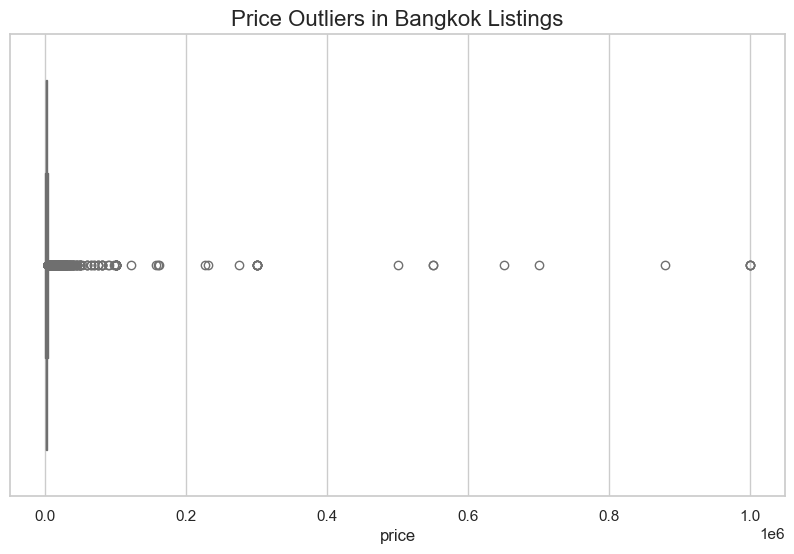

In [117]:
# Set the plot style
sns.set(style="whitegrid")

# Create a boxplot for the 'price' column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='price', color='skyblue')

# Add a title
plt.title('Price Outliers in Bangkok Listings', fontsize=16)
plt.show()

2. Finding outliers in the `minimum_nights` column

In [118]:
# Find outliers in 'minimum_nights' column
price_outliers = find_outliers_iqr(df, 'minimum_nights')

# Show the rows with outliers
print(price_outliers[['name', 'minimum_nights']])

                                      name  minimum_nights
2        modern-style apartment in Bangkok              60
30          NEw Pro!!  Bungalow Bkk Centre             250
45     Contemporary Modern Duplex-Thong Lo              60
52      ICONSIAM River view  on 49th floor             180
56     2br apt in Sukhumvit Asoke near BTS              90
...                                    ...             ...
17140       Near Famous Train Night Market              90
17330     1 bed 1 bath MRT Rama 9 Joddfair              90
17337         Studio room only 200m to BTS             180
17345                           Super idol              80
17376      High Fl Chic/Airport rail/Wi-fi              45

[805 rows x 2 columns]


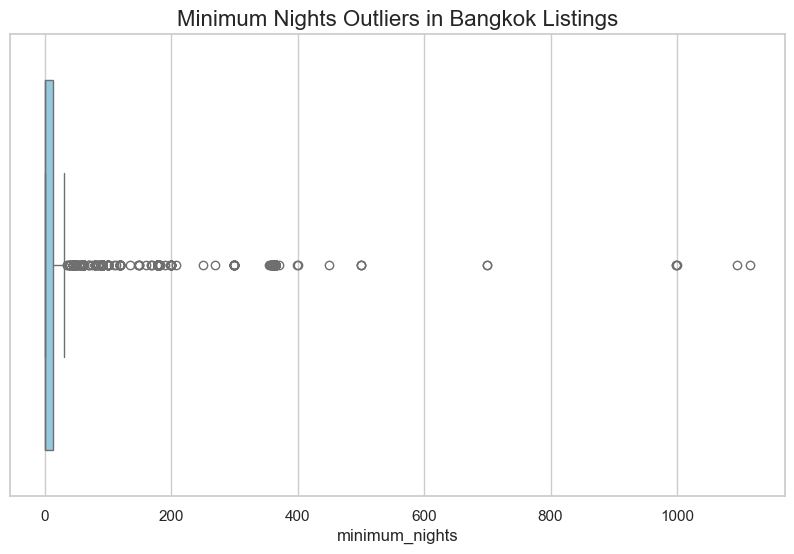

In [119]:
# Set the plot style
sns.set(style="whitegrid")

# Create a boxplot for the 'minimum_nights' column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='minimum_nights', color='skyblue')

# Add a title
plt.title('Minimum Nights Outliers in Bangkok Listings', fontsize=16)
plt.show()

3. Finding outliers in the `number_of_reviews` column

In [120]:
# Find outliers in 'number_of_reviews' column
price_outliers = find_outliers_iqr(df, 'number_of_reviews')

# Show the rows with outliers
print(price_outliers[['name', 'number_of_reviews']])

                                                    name  number_of_reviews
0                        Nice room with superb city view                 65
5                              Near Suvarnabhumi Airport                 63
9           Newly Renovated 3BR Suite 146sqm BTS Thonglo                265
10     ❂Citycenter✺Subway station✺Private Bathroom✺A1...                201
11          Comfy bedroom near River pier & BTS  Taksin.                208
...                                                  ...                ...
14267  Bangkok Cheesy-Loft by The Locals (Newly opened)*                 45
14268   Bangkok The locals-Loft Ideal for family/friends                 40
14314  1BR-BTS Ekamai 300m-Sky Infinity Pool&Gym-Suns...                 55
14319      2BR-BTS Ekamai 300m-Sky Infinity Pool&Gym-tub                 67
14461         1BR- BTS Ekamai 300m-Sky infinity Pool&Gym                157

[2279 rows x 2 columns]


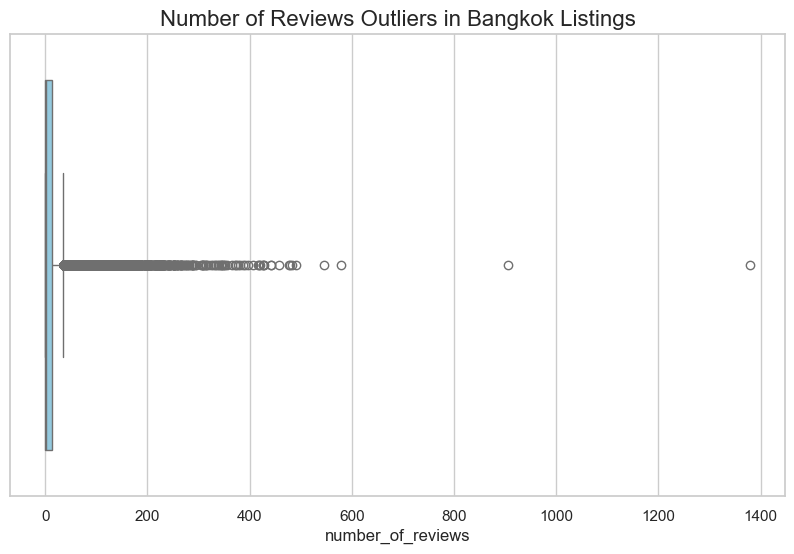

In [121]:
# Set the plot style
sns.set(style="whitegrid")

# Create a boxplot for the 'number_of_reviews' column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='number_of_reviews', color='skyblue')

# Add a title
plt.title('Number of Reviews Outliers in Bangkok Listings', fontsize=16)
plt.show()

4. Finding outliers in the `reviews_per_month` column

In [122]:
# Find outliers in 'reviews_per_month' column
price_outliers = find_outliers_iqr(df, 'reviews_per_month')

# Show the rows with outliers
print(price_outliers[['name', 'reviews_per_month']])

                                                    name  reviews_per_month
9           Newly Renovated 3BR Suite 146sqm BTS Thonglo               2.16
39                      The Duplex - Asoke- Luxury 92sqm               2.54
58           ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀               3.69
60     ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs...               2.58
62                  ☞Downtown Central Studio-Bangkok MRT               2.95
...                                                  ...                ...
17034      1br/Free pool&gym/WIFI-Asok/SukhumvitBTS! 2PP               3.00
17035                        Deluxe 1 Bedroom - GYM/WIFI               4.00
17151                               Hot Summer三层Loft高级公寓               3.00
17159  NEW5minswalk>BTS Eakamai/TV65netflix/Water Mac...               3.00
17270                   Awesome 1bed 2min walk BTS Onnut               3.00

[1398 rows x 2 columns]


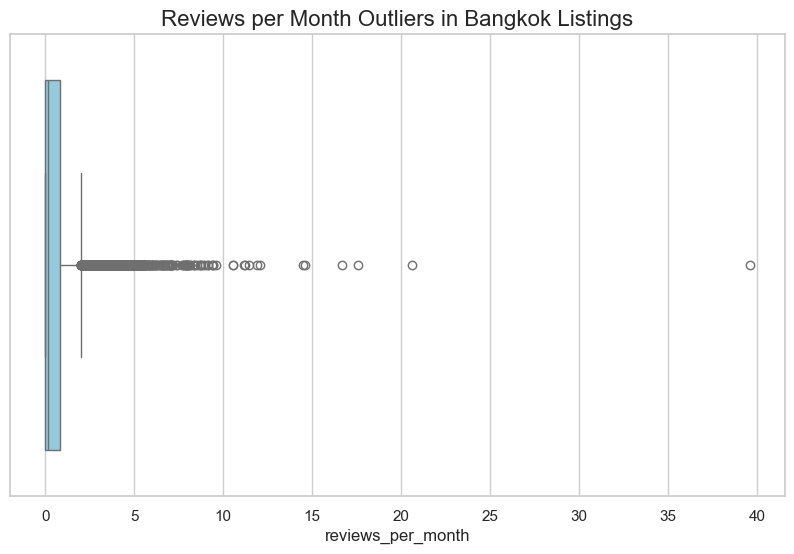

In [123]:
# Set the plot style
sns.set(style="whitegrid")

# Create a boxplot for the 'reviews_per_month' column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='reviews_per_month', color='skyblue')

# Add a title
plt.title('Reviews per Month Outliers in Bangkok Listings', fontsize=16)
plt.show()

5. Finding outliers in the `calculated_host_listings_count` column

In [124]:
# Find outliers in 'calculated_host_listings_count' column
price_outliers = find_outliers_iqr(df, 'calculated_host_listings_count')

# Show the rows with outliers
print(price_outliers[['name', 'calculated_host_listings_count']])  

                                                    name  \
30                        NEw Pro!!  Bungalow Bkk Centre   
103                         Spacious Studio kitchen/wifi   
107                      2. Bangkok bright Apartment 201   
108                    1.Bangkok great value Studio WIFI   
111             BKK City Fab Luxx Studio free wifi @1194   
...                                                  ...   
17317    市中心无敌城市景观雅致一室一厅套房 四面佛1公里 机场20分钟直达素坤逸娜娜 火车夜市10分钟   
17333   Perfect location# Pool#Gym@BTS/MRT&2BR#5ppl(116)   
17334    Perfect location# Pool#Gym@BTS/MRT&2BR#5ppl(98)   
17336  Perfect location# Pool#Gym@BTS/MRT&10F&Max3ppl...   
17338   Perfect location# Pool#Gym@BTS/MRT&2BR#5ppl(118)   

       calculated_host_listings_count  
30                                 44  
103                                44  
107                                44  
108                                44  
111                                44  
...                               ...  

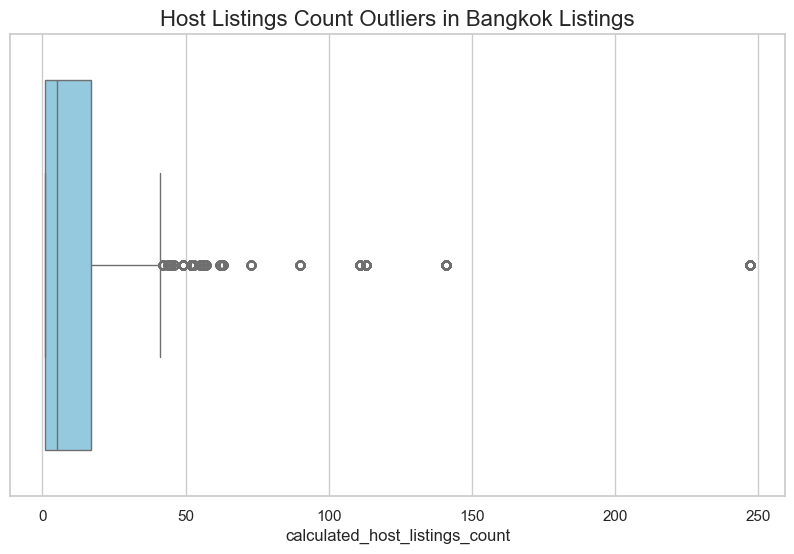

In [125]:
# Set the plot style
sns.set(style="whitegrid")

# Create a boxplot for the 'calculated_host_listings_count' column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='calculated_host_listings_count', color='skyblue')

# Add a title
plt.title('Host Listings Count Outliers in Bangkok Listings', fontsize=16)
plt.show()

6. Finding outliers in the `availability_365` column

In [126]:
# Find outliers in 'availability_365' column
price_outliers = find_outliers_iqr(df, 'availability_365')

# Show the rows with outliers
print(price_outliers[['name', 'availability_365']])

Empty DataFrame
Columns: [name, availability_365]
Index: []


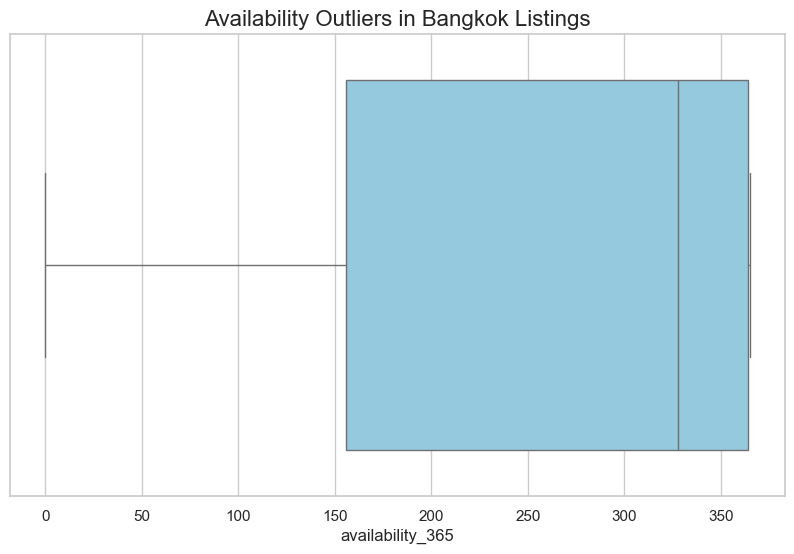

In [127]:
# Set the plot style
sns.set(style="whitegrid")

# Create a boxplot for the 'availability_365' column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='availability_365', color='skyblue')

# Add a title
plt.title('Availability Outliers in Bangkok Listings', fontsize=16)
plt.show()

Since the year 2023 has 365 days, availability should be within 365 days. Hence, there is no abnormal value in the `availability_365` column based on the graph above.

**Insights:**
1. The `id` and `host_id` columns' data type is **integer**, which is incorrect as they are qualitative variables, thus it should be **string**.
1. There are null values in `name` and `host_name`
1. Outliers exist in some quantitative columns, but the ones that potentially require cleaning would be `minimum_nights` and `review_per_month` since they are time-restricted. Time-restricted values have limitations where they are still considered acceptable vs abnormal.

### 5. Data Cleaning

#### Changing Incorrect Data Types

In [128]:
# Changing the data type of the 'id' column
df['id'] = df['id'].astype(str)

# Check the data type of 'id' now
print(f"Now, the data type of the 'id' column has become {df['id'].dtype}.")

Now, the data type of the 'id' column has become object.


In [129]:
# Changing the data type of the 'host_id' column
df['host_id'] = df['host_id'].astype(str)

# Check the data type of 'host_id' now
print(f"Now, the data type of the 'host_id' column has become {df['host_id'].dtype}.")

Now, the data type of the 'host_id' column has become object.


#### Handling Null/Missing Values

1. The `name` column only acts as a non-unique identifier of a listing. So, the value does not have any specific pattern or rule. We are going to fill up missing values with 'unnamed'.

In [130]:
# Check the columns where 'name' is null
df[df['name'].isnull()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
395,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,0.00,1,365
488,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,0.00,1,365
521,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,0.00,1,365
840,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2399,2,0,0.00,1,365
1152,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,0.00,1,365
1369,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,0.07,1,364
1612,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,0.00,1,365
2045,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,0.03,3,304


In [131]:
# Fill null values in the 'name' column with 'Unnamed'
df['name'].fillna('Unnamed', inplace=True)

# Check if it worked
print(f"Currently, the number of null value(s) in the 'name' column is {df['name'].isnull().sum()}.")

Currently, the number of null value(s) in the 'name' column is 0.


C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_36416\339419567.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('Unnamed', inplace=True)


2. The `host_name` column shows the name of the host owning the listing. In the table, there is another identifier for host, which is `host_id`. We are going to check what the value in the `host_id` column on the row where `host_name` value is missing.

In [132]:
# Check the columns where 'host_name' is null
df[df['host_name'].isnull()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
3487,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,0.01,1,365


In [133]:
# Display all columns with the same host_id
df[df['host_id']=='137488762']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
3487,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,0.01,1,365


Because there is no other row with the same host_id, we will use the host_id as host_name.

In [134]:
# Fill empty host_name with its host_id
df['host_name'].fillna(df['host_id'],inplace=True)

# Check if it worked
print(f"Currently, the number of null value(s) in the 'host_name' column is {df['host_name'].isnull().sum()}.")

Currently, the number of null value(s) in the 'host_name' column is 0.


C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_36416\2218461137.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['host_name'].fillna(df['host_id'],inplace=True)


#### Handling Outliers

Next, we will handle outliers in the `review_per_month` column.

Since we have the `minimum_nights` data, we can determine the realistic values of `review_per_month` per listing.

However, there is also additional information to be taken into account. Airbnb has a policy that user can only leave a review a maximum of 14 (fourteen) days after checkout (Source: https://www.airbnb.com/help/article/995). So, there could be carry-overs from the previous month.

In [135]:
# Create a function to calculate realistic number of review per month

def max_rpm_calc(min_nights:int):
    # Calculate maximum number of stays per month
    max_num_stay = 30/min_nights

    # Calculate maximum number of carry-over from the previous month
    max_carry_over = 14/min_nights

    # Assuming the first month has maximum carry-over from the previous year, let's calculate the maximum average review per month
    max_avg_rpm = ((max_num_stay*12)+max_carry_over)/12
    
    return max_avg_rpm


In [136]:
# Create a new column to store this value
df['max_rpm'] = df['minimum_nights'].apply(lambda x: max_rpm_calc(x))

df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,max_rpm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1885,3,65,0.49,2,362,10.388889
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1307,1,0,0.00,2,358,31.166667
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0.00,1,365,0.519444
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,3,0.04,1,358,4.452381
4,906203,1 BR on Srinakrin Rd. Parkland,4850305,Dujdao,Bang Na,13.65441,100.64548,Private room,791,1,0,0.00,1,365,31.166667


If `review_per_month` is more than `max_rpm`, the data is most likely false.

Assume we want a confidence level of at least 90%. We will see how many rows have significantly different `review_per_month` and `max_rpm` values (more than 10%).

In [137]:
# See if there are such rows

print(f"There are {len(df[((df['reviews_per_month']-df['max_rpm'])/df['max_rpm'] * 100) > 10])} ({len(df[((df['reviews_per_month']-df['max_rpm'])/df['max_rpm'] * 100) > 10]) / len(df) * 100}%) rows containing an unrealistic review per month value.")


There are 415 (2.3856058864106693%) rows containing an unrealistic review per month value.


Because the number of abnormal rows is insignificant (less than 5%), we will drop the columns.

In [138]:
df = df[((df['reviews_per_month']-df['max_rpm'])/df['max_rpm'] * 100) <= 10]

In [139]:
# Dropping the max_rpm column
df = df.drop('max_rpm', axis=1)

#### Checking cleaned up data

In [140]:
listItem = []
for col in df.columns :
    listItem.append([   col,
                        df[col].dtype ,
                        df[col].isnull().sum(),
                        f"{(df[col].isnull().sum()/df[col].shape[0])*100:.2f}%",
                        df[col].nunique(),
                        df[col].unique()])

tabel_Desc = pd.DataFrame(columns=['Column Name','Data Type','Null', 'Percentace Null', 'Number of Unique', 'Unique Sample'],
                    data=listItem)

print(df.shape)
tabel_Desc

(16981, 14)


,Column Name,Data Type,Null,Percentace Null,Number of Unique,Unique Sample
0,id,object,0,0.00%,16981,"[27934, 27979, 28745, 35780, 906203, 1657411, ..."
1,name,object,0,0.00%,15577,"[Nice room with superb city view, Easy going l..."
2,host_id,object,0,0.00%,6766,"[120437, 120541, 123784, 153730, 4850305, 8362..."
3,host_name,object,0,0.00%,5393,"[Nuttee, Emy, Familyroom, Sirilak, Dujdao, Luc..."
4,neighbourhood,object,0,0.00%,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, L..."
5,latitude,float64,0,0.00%,11236,"[13.75983, 13.66818, 13.75232, 13.78823, 13.65..."
6,longitude,float64,0,0.00%,11860,"[100.54134, 100.61674, 100.62402, 100.57256, 1..."
7,room_type,object,0,0.00%,4,"[Entire home/apt, Private room, Hotel room, Sh..."
8,price,int64,0,0.00%,2969,"[1885, 1307, 800, 1286, 791, 1302, 1547, 3549,..."
9,minimum_nights,int64,0,0.00%,81,"[3, 1, 60, 7, 2, 5, 30, 28, 15, 25, 180, 90, 4..."


In [141]:
print(f'The numbers of rows and columns in the cleaned dataset are {df.shape}')

The numbers of rows and columns in the cleaned dataset are (16981, 14)


### 6. Exploratory Data Analysis (EDA)

#### Finding the most popular neighbourhood

Let's create a summary table for each neighbourhood and display the summary of the top 10 neighbourhood by count.

In [147]:
# Summary statistics for each room_type
summary_stats = df.groupby('neighbourhood').agg(
    count=('room_type', 'count'),
    price_mean=('price', 'mean'),
    price_median=('price', 'median'),
    price_std=('price', 'std'),
    reviews_sum=('number_of_reviews', 'sum'),
    reviews_mean=('number_of_reviews', 'mean'),
    reviews_median=('number_of_reviews', 'median'),
    reviews_std=('number_of_reviews', 'std'),
    rpm_mean=('reviews_per_month', 'mean'),
    rpm_median=('reviews_per_month', 'median'),
    rpm_std=('reviews_per_month', 'std')
).sort_values(by='count', ascending=False).reset_index()

summary_stats.head(10)

,neighbourhood,count,price_mean,price_median,price_std,reviews_sum,reviews_mean,reviews_median,reviews_std,rpm_mean,rpm_median,rpm_std
0,Vadhana,2434,3282.442071,1817.0,8314.738945,36192,14.869351,2.0,31.458298,0.653809,0.185,1.050828
1,Khlong Toei,2265,3153.482119,1600.0,21763.965850,44564,19.675055,6.0,39.905536,0.951011,0.410,1.377470
2,Huai Khwang,1264,3540.724684,1280.0,30124.160264,16072,12.715190,1.0,32.423434,0.458339,0.090,0.727208
3,Ratchathewi,1188,3003.846801,1490.0,17683.284495,20953,17.637205,2.0,36.123613,0.568342,0.190,0.939104
4,Sathon,869,2071.521289,1200.0,4028.301787,22790,26.225547,4.0,59.436697,0.710311,0.330,0.965912
5,Bang Rak,834,2850.338129,1800.0,10634.962495,18227,21.854916,4.0,43.154841,0.631127,0.170,1.170196
6,Phra Nakhon,650,1719.209231,1118.0,1743.919954,10004,15.390769,2.0,33.906350,0.654462,0.080,1.272912
7,Phra Khanong,603,1478.258706,999.0,2539.796936,6282,10.417910,2.0,25.454561,0.561841,0.120,1.156268
8,Chatu Chak,589,3092.419355,1100.0,21528.301294,8205,13.930390,1.0,36.679160,0.443447,0.030,0.839267
9,Parthum Wan,482,3936.742739,2090.5,14495.512226,8718,18.087137,3.0,37.165594,0.569046,0.210,0.836922


C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_36416\3771358787.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_stats.head(10), y='neighbourhood', x='count', palette='viridis')


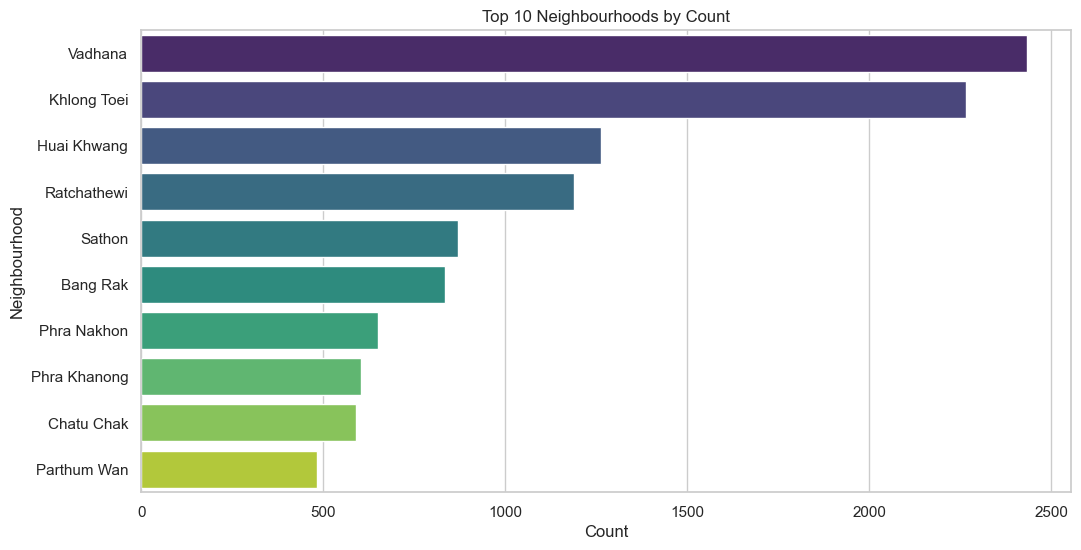

In [148]:
# Visualize the top 10 neighbourhoods by count using a horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_stats.head(10), y='neighbourhood', x='count', palette='viridis')
plt.title('Top 10 Neighbourhoods by Count')
plt.xlabel('Count')
plt.ylabel('Neighbourhood')
plt.show()

C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_36416\3807553349.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_stats.sort_values(by='reviews_mean', ascending=False).head(10), y='neighbourhood', x='reviews_mean', palette='viridis')


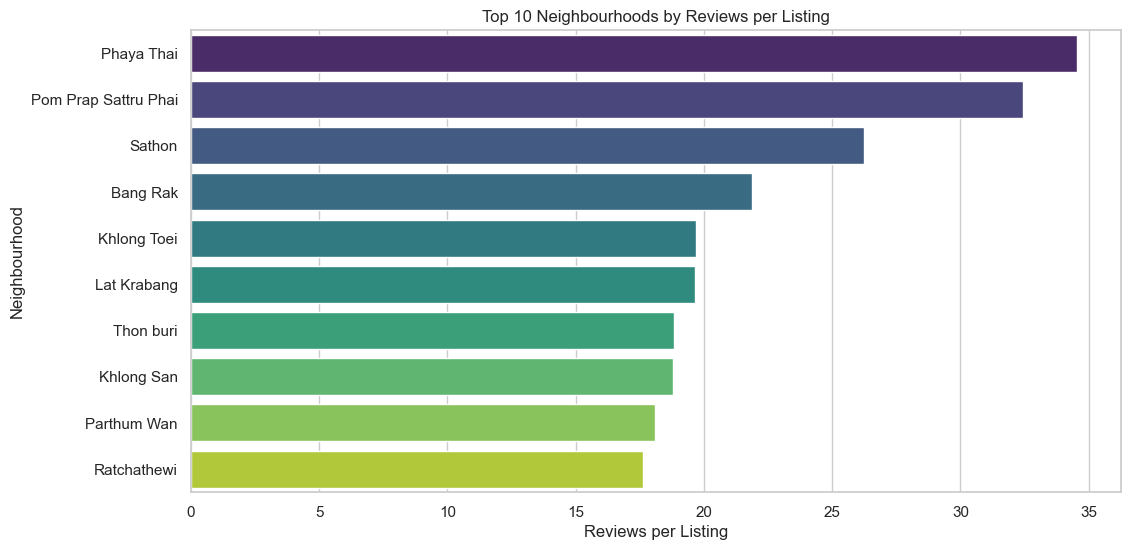

In [149]:
# Visualize the top 10 neighbourhoods by reviews per listing (reviews_mean)
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_stats.sort_values(by='reviews_mean', ascending=False).head(10), y='neighbourhood', x='reviews_mean', palette='viridis')
plt.title('Top 10 Neighbourhoods by Reviews per Listing')
plt.ylabel('Neighbourhood')
plt.xlabel('Reviews per Listing')
plt.show()

C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_36416\3919302021.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_stats.sort_values(by='rpm_median', ascending=False).head(10), y='neighbourhood', x='rpm_median', palette='viridis')


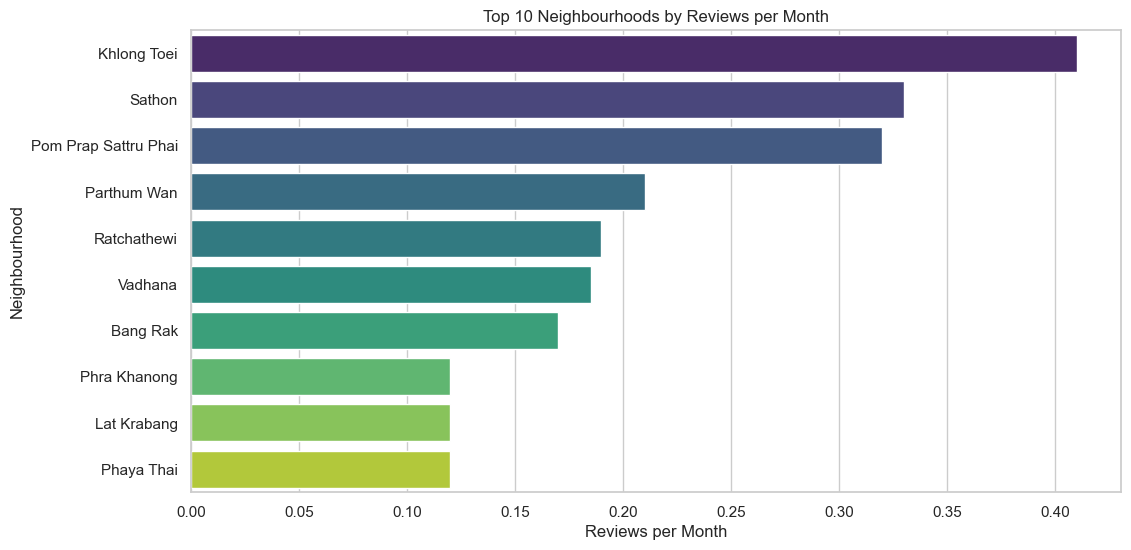

In [150]:
# Visualize the top 10 neighbourhoods by reviews per month tendency (rpm_median)
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_stats.sort_values(by='rpm_median', ascending=False).head(10), y='neighbourhood', x='rpm_median', palette='viridis')
plt.title('Top 10 Neighbourhoods by Reviews per Month')
plt.ylabel('Neighbourhood')
plt.xlabel('Reviews per Month')
plt.show()

C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_36416\1024475734.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_stats.sort_values(by='price_median', ascending=True).head(10), y='neighbourhood', x='price_median', palette='viridis')


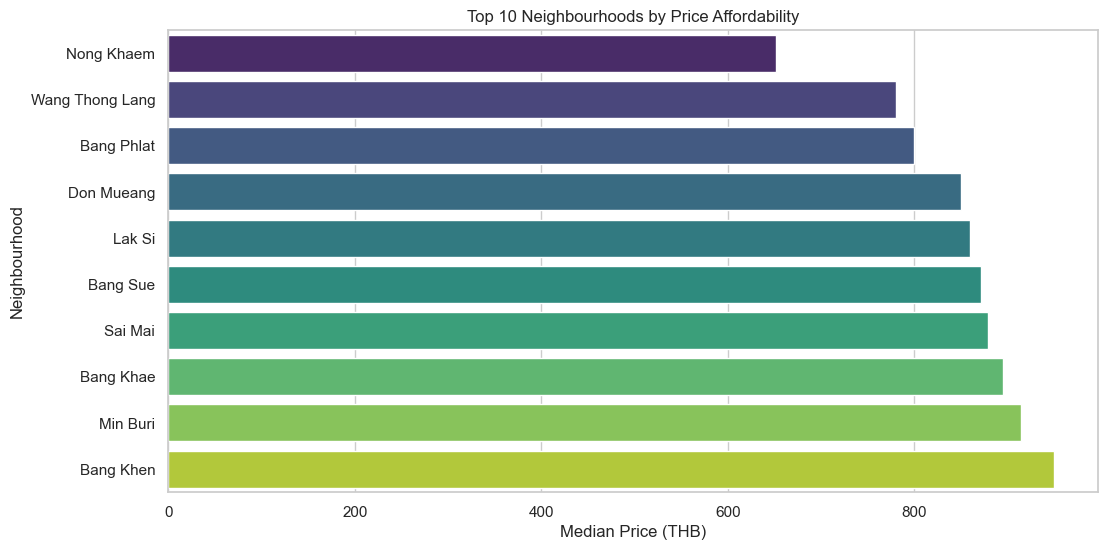

In [151]:
# Visualize the top 10 cheapest neighbourhoods by price median (rpm_median)
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_stats.sort_values(by='price_median', ascending=True).head(10), y='neighbourhood', x='price_median', palette='viridis')
plt.title('Top 10 Neighbourhoods by Price Affordability')
plt.ylabel('Neighbourhood')
plt.xlabel('Median Price (THB)')
plt.show()

Next, we are going to formulate a scoring criteria for the strategic value of each neighbourhood based on the following criteria:

1. Number of reviews per listing (mean)<br>
→ Higher = better (indicates high activity, popularity, and trust)

1. Reviews per month (median)<br>
→ Higher = better (indicates consistent demand)

1. Count<br>
→ Higher = better (indicates crowded activity in the area and high survivability rate)<br>
→ The weight for this metric will be lower since higher count also means high competition

In [152]:
# Score each metric


# Normalize mean_reviews (0–1)
summary_stats['reviews_score'] = (summary_stats['reviews_mean'] - summary_stats['reviews_mean'].min()) / (summary_stats['reviews_mean'].max() - summary_stats['reviews_mean'].min())

# Normalize median_rpm (0–1)
summary_stats['rpm_score'] = (summary_stats['rpm_median'] - summary_stats['rpm_median'].min()) / (summary_stats['rpm_median'].max() - summary_stats['rpm_median'].min())

# Normalize count (0-1)
summary_stats['count_score'] = (summary_stats['count'] - summary_stats['count'].min()) / (summary_stats['count'].max() - summary_stats['count'].min())

# Count the final strategic score
summary_stats['strategic_score'] = (
    0.35 * summary_stats['reviews_score'] +
    0.4 * summary_stats['rpm_score'] +
    0.25 * summary_stats['count_score']
)

In [153]:
top_5_neighbourhoods = summary_stats.sort_values(by='strategic_score', ascending=False).head(5)
top_5_neighbourhoods

,neighbourhood,count,price_mean,price_median,price_std,reviews_sum,reviews_mean,reviews_median,reviews_std,rpm_mean,rpm_median,rpm_std,reviews_score,rpm_score,count_score,strategic_score
1,Khlong Toei,2265,3153.482119,1600.0,21763.965850,44564,19.675055,6.0,39.905536,0.951011,0.410,1.377470,0.568175,1.000000,0.930395,0.831460
4,Sathon,869,2071.521289,1200.0,4028.301787,22790,26.225547,4.0,59.436697,0.710311,0.330,0.965912,0.758549,0.804878,0.355437,0.676303
25,Pom Prap Sattru Phai,131,2550.167939,1647.0,2516.680127,4249,32.435115,4.0,70.147438,0.740534,0.320,1.053883,0.939016,0.780488,0.051483,0.653721
0,Vadhana,2434,3282.442071,1817.0,8314.738945,36192,14.869351,2.0,31.458298,0.653809,0.185,1.050828,0.428509,0.451220,1.000000,0.580466
12,Phaya Thai,403,1937.672457,1400.0,1747.838750,13917,34.533499,4.0,86.782686,0.613325,0.120,1.324238,1.000000,0.292683,0.163509,0.507950


C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_36416\3323699761.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_neighbourhoods, y='neighbourhood', x='strategic_score', palette='viridis')


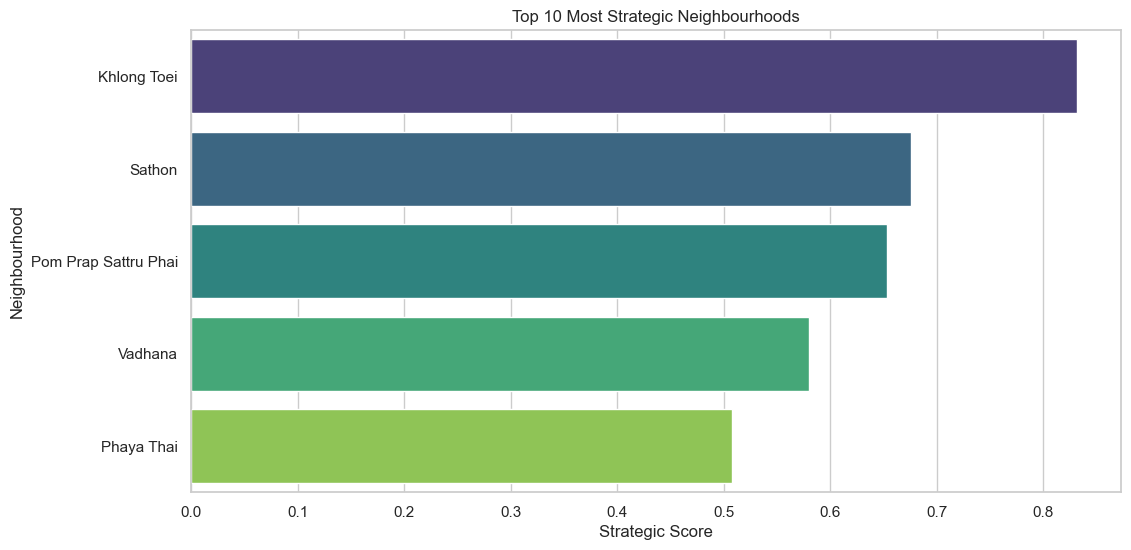

In [154]:
# Visualize the top 10 neighbourhoods by strategic score
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5_neighbourhoods, y='neighbourhood', x='strategic_score', palette='viridis')
plt.title('Top 10 Most Strategic Neighbourhoods')
plt.ylabel('Neighbourhood')
plt.xlabel('Strategic Score')
plt.show()

Let's analyze these 5 neighbourhoods based on **apartment sales price** and **general area information** that can be found on the Internet. For **apartment sales price**, we used the help of LLMs to summarize actual sales data from FazWaz, Thailand Property, and Hipflat.

| Neighbourhood Name | Avg. Sales Price per sqm (THB) | General Area Description |
|---|---|---|
| Khlong Toei | 190,000 | Tourism area with famous local markets |
| Pom Prap Sattru Phai | 190,644 | Historic old town with traditional buildings, less commercialized |
| Sathon | 240,000 | Luxury business district with a vibrant nightlife |
| Vadhana (watthana) | 150,000 | Trendy district among expatriates and young professionals |
| Phaya Thai | 158,000 | Major transportation hub, a mixture of residential and commercial properties |

**Insights:**
<br>Among the top 5 areas, Khlong Toei has the biggest return potential despite the average sales price not being the lowest. This is because the area is bustling with tourists and highly commercialized.

**Conclusion:**<br>
From the EDA, the most profitable strategy is to open an Airbnb with **Entire home/apt** room type in **Khlong Toei** with a price range of **1000-2000 THB**.

### Area-based Analysis

Now, we are going to perform a more thorough analysis on the top 5 areas. There are two specific areas that we are interested in:
1. The most popular room type in the area
1. The acceptable price range for each room type in the are

Before beginning the analyses, let's perform a preliminary assessment of the `price` column to best determine the price range categorization.

In [212]:
# Describe the 'price' column
df['price'].describe()

count      16981.000000
mean        2737.403686
std        16715.217264
min          278.000000
25%          900.000000
50%         1389.000000
75%         2250.000000
max      1000000.000000
Name: price, dtype: float64

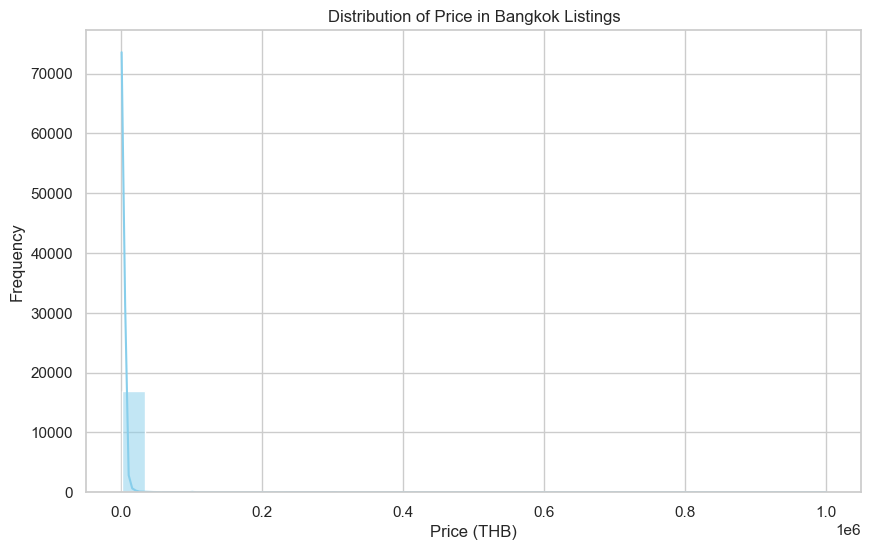

In [213]:
# Visualize the distribution of the 'price' column
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Price in Bangkok Listings')
plt.xlabel('Price (THB)')
plt.ylabel('Frequency')
plt.show()

In [214]:
# Find out the skewness and kurtosis of the 'price' column
price_skewness = df['price'].skew()
price_kurtosis = df['price'].kurtosis()
print(f"Skewness of price: {price_skewness:.2f}")
print(f"Kurtosis of price: {price_kurtosis:.2f}")

Skewness of price: 37.73
Kurtosis of price: 1737.18


**Insights:**<br>
The `price` data is extremely skewed and has a highly abnormal distributon. Thus, for the range categorization, we will use custom-sized bins as follows:

| Price Range (THB) | Category |
|---|---|
| < 500 | Budget |
| 500 - 1000 | Affordable |
| 1000 - 2000 | Mid-tier |
| 2000 - 5000 | High-end |
| 5000 - 10,000 | Premium |
| >= 10,000 | Luxury |

Now we are ready to perform our area-based analysis.

##### 1. Khlong Toei

Khlong Toei is a tourist area with many tourist attractions such as Khlong Toei Market, Bamboo Bicycle Tours, and Bangkok Soap Opera (https://www.thailand.org/THINGS-TO-DO-in-khlong-toei-t.html). Khlong Toei is a hotspot for Airbnbs as the count of Airbnb listings in it far surpasses other areas in Bangkok.

In [217]:
# Create a room type summary table including price median, number of reviews, and reviews per month for Khlong Toei
room_type_summary_khlong_toei = df[df['neighbourhood'] == 'Khlong Toei'].groupby('room_type').agg(
    count=('room_type', 'count'),
    count_percentage=('room_type', lambda x: len(x) / len(df[df['neighbourhood'] == 'Khlong Toei']) * 100),
    price_median=('price', 'median'),
    reviews_sum=('number_of_reviews', 'sum'),
    reviews_mean=('number_of_reviews', 'mean'),
    reviews_median=('number_of_reviews', 'median'),
    reviews_std=('number_of_reviews', 'std'),
    rpm_mean=('reviews_per_month', 'mean'),
    rpm_median=('reviews_per_month', 'median'),
    rpm_std=('reviews_per_month', 'std')
).sort_values(by='count', ascending=False).reset_index()
room_type_summary_khlong_toei

,room_type,count,count_percentage,price_median,reviews_sum,reviews_mean,reviews_median,reviews_std,rpm_mean,rpm_median,rpm_std
0,Entire home/apt,1647,72.715232,1611.0,37226,22.602307,9.0,35.381247,1.128664,0.650,1.408883
1,Private room,510,22.516556,1500.0,3035,5.950980,1.0,14.746967,0.418314,0.030,1.023724
2,Hotel room,90,3.973510,2500.0,4238,47.088889,3.0,118.576164,0.607444,0.065,1.314495
3,Shared,18,0.794702,515.5,65,3.611111,2.0,4.060410,1.506667,0.075,2.748642


C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_36416\2304003288.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=room_type_summary_khlong_toei, x='room_type', y='count', palette='viridis')


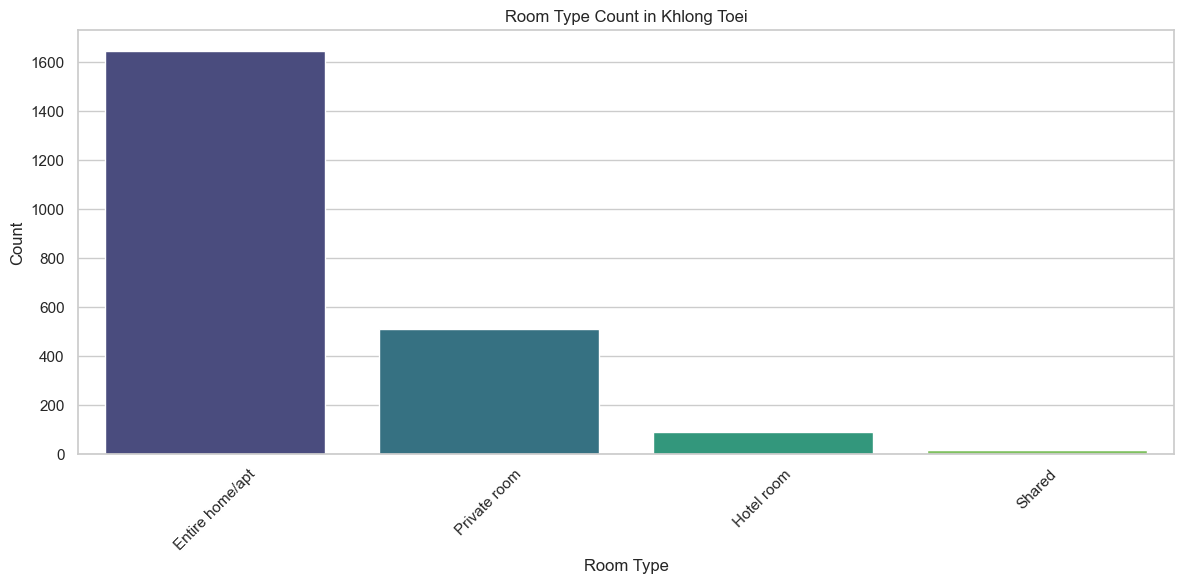

In [218]:
# Visualize the room type count for Khlong Toei
plt.figure(figsize=(12, 6))
sns.barplot(data=room_type_summary_khlong_toei, x='room_type', y='count', palette='viridis')
plt.title('Room Type Count in Khlong Toei')
plt.ylabel('Count')
plt.xlabel('Room Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [157]:
# Grouping each room type into price ranges: Below 500, 500-1000, 1000-2000, 2000-5000, 5000-10000, and above 10000 in Khlong Toei
room_type_price_ranges = df[df['neighbourhood']=='Khlong Toei'].groupby(['room_type', 'price_range']).size().unstack().fillna(0)
room_type_price_ranges

C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_36416\1649838638.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  room_type_price_ranges = df[df['neighbourhood']=='Khlong Toei'].groupby(['room_type', 'price_range']).size().unstack().fillna(0)


price_range,< 500 THB,500-1000 THB,1000-2000 THB,2000-5000 THB,5000-10000 THB,>= 10000 THB
room_type,,,,,,
Entire home/apt,0,198,901,460,74,14
Hotel room,4,9,27,20,24,6
Private room,4,111,212,133,30,20
Shared,7,7,2,2,0,0


<Figure size 1200x600 with 0 Axes>

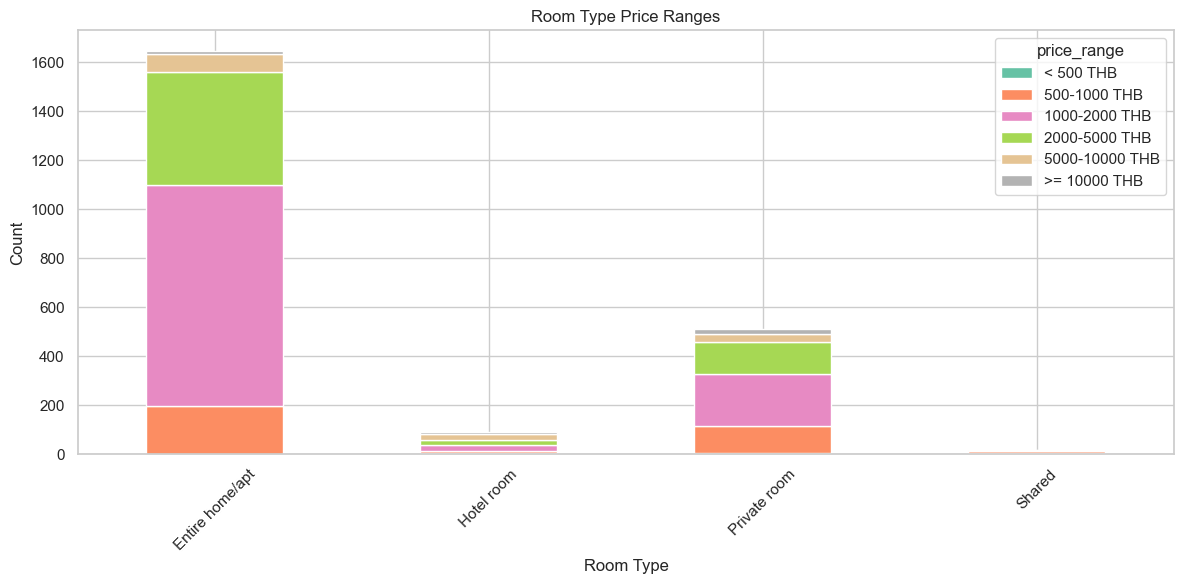

In [158]:
# Visualize the room type price ranges
plt.figure(figsize=(12, 6))
room_type_price_ranges.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Room Type Price Ranges')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [226]:
# Create a table to show the number of reviews and reviews per month for each room type in Khlong Toei
room_type_reviews = df[df['neighbourhood'] == 'Khlong Toei'].groupby('room_type').agg(
    reviews_sum=('number_of_reviews', 'sum'),
    reviews_mean=('number_of_reviews', 'mean'),
    reviews_median=('number_of_reviews', 'median'),
    reviews_std=('number_of_reviews', 'std'),
    rpm_mean=('reviews_per_month', 'mean'),
    rpm_median=('reviews_per_month', 'median'),
    rpm_std=('reviews_per_month', 'std')
).sort_values(by='reviews_sum', ascending=False).reset_index()
room_type_reviews

,room_type,reviews_sum,reviews_mean,reviews_median,reviews_std,rpm_mean,rpm_median,rpm_std
0,Entire home/apt,37226,22.602307,9.0,35.381247,1.128664,0.650,1.408883
1,Hotel room,4238,47.088889,3.0,118.576164,0.607444,0.065,1.314495
2,Private room,3035,5.950980,1.0,14.746967,0.418314,0.030,1.023724
3,Shared,65,3.611111,2.0,4.060410,1.506667,0.075,2.748642


In [229]:
# Create a table to show the number of reviews and reviews per month for each room type and price range in Khlong Toei
room_type_reviews = df[df['neighbourhood'] == 'Khlong Toei'].groupby(['room_type', 'price_range']).agg(
    reviews_sum=('number_of_reviews', 'sum'),
    reviews_mean=('number_of_reviews', 'mean'),
    reviews_median=('number_of_reviews', 'median'),
    reviews_std=('number_of_reviews', 'std'),
    rpm_mean=('reviews_per_month', 'mean'),
    rpm_median=('reviews_per_month', 'median'),
    rpm_std=('reviews_per_month', 'std')
).sort_values(by='reviews_median', ascending=False).reset_index()
room_type_reviews

C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_36416\568646738.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  room_type_reviews = df[df['neighbourhood'] == 'Khlong Toei'].groupby(['room_type', 'price_range']).agg(


,room_type,price_range,reviews_sum,reviews_mean,reviews_median,reviews_std,rpm_mean,rpm_median,rpm_std
0,Hotel room,2000-5000 THB,3717,185.850000,98.0,198.344006,2.144000,1.455,2.161825
1,Entire home/apt,2000-5000 THB,12067,26.232609,12.0,39.112265,1.307217,0.760,1.634321
2,Entire home/apt,1000-2000 THB,20341,22.576027,9.0,34.494219,1.201099,0.790,1.375196
3,Hotel room,< 500 THB,35,8.750000,7.5,9.069179,0.172500,0.155,0.171148
4,Entire home/apt,5000-10000 THB,1410,19.054054,7.0,29.187111,1.050405,0.360,1.448840
5,Hotel room,1000-2000 THB,344,12.740741,7.0,13.523747,0.298519,0.300,0.294366
6,Shared,500-1000 THB,46,6.571429,7.0,4.314979,2.640000,0.120,3.502252
7,Entire home/apt,500-1000 THB,3329,16.813131,6.0,32.351032,0.464899,0.285,0.578842
8,Private room,< 500 THB,46,11.500000,5.0,14.364308,0.272500,0.190,0.247572
9,Hotel room,500-1000 THB,98,10.888889,5.0,13.090497,0.226667,0.100,0.290861


**Insights:**
1. In Khlong Toei, an **Entire home/apt** with a price range of **1000-2000 THB** is most common, but high-end listings with a **2000-5000 THB** price range have a higher potential. This is because tourists often prioritize comfort over affordability.
1. The area is in need of more hotel rooms. There is a high review activity in the 90 hotel room listings available, surpassing private room and shared.
1. Shared rooms are both uncommon and unpopular (has a low review activity).

##### 2. Sathon

Sathon is one of Bangkok's original central business districts. It is characterized by numerous office towers, particularly around the Chong Nonsi BTS station. The area is a hub for business activities and features a mix of modern skyscrapers and luxury hotels (https://www.youtube.com/watch?v=hZDOzNZIwBw&utm).

In [215]:
# Create a room type summary table including price median, number of reviews, and reviews per month for Sathon
room_type_summary_sathon = df[df['neighbourhood'] == 'Sathon'].groupby('room_type').agg(
    count=('room_type', 'count'),
    count_percentage=('room_type', lambda x: len(x) / len(df[df['neighbourhood'] == 'Sathon']) * 100),
    price_median=('price', 'median'),
    reviews_sum=('number_of_reviews', 'sum'),
    reviews_mean=('number_of_reviews', 'mean'),
    reviews_median=('number_of_reviews', 'median'),
    reviews_std=('number_of_reviews', 'std'),
    rpm_mean=('reviews_per_month', 'mean'),
    rpm_median=('reviews_per_month', 'median'),
    rpm_std=('reviews_per_month', 'std')
).sort_values(by='count', ascending=False).reset_index()
room_type_summary_sathon

,room_type,count,count_percentage,price_median,reviews_sum,reviews_mean,reviews_median,reviews_std,rpm_mean,rpm_median,rpm_std
0,Entire home/apt,581,66.858458,1236.0,20496,35.277108,9.0,69.578217,0.911876,0.620,1.047759
1,Private room,255,29.344074,1199.0,1778,6.972549,0.0,15.769602,0.317686,0.000,0.620882
2,Shared,18,2.071346,545.0,184,10.222222,1.5,21.292240,0.167778,0.035,0.259220
3,Hotel room,15,1.726122,2500.0,332,22.133333,0.0,53.911126,0.228667,0.000,0.410311


C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_36416\253260913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=room_type_summary_sathon, x='room_type', y='count', palette='viridis')


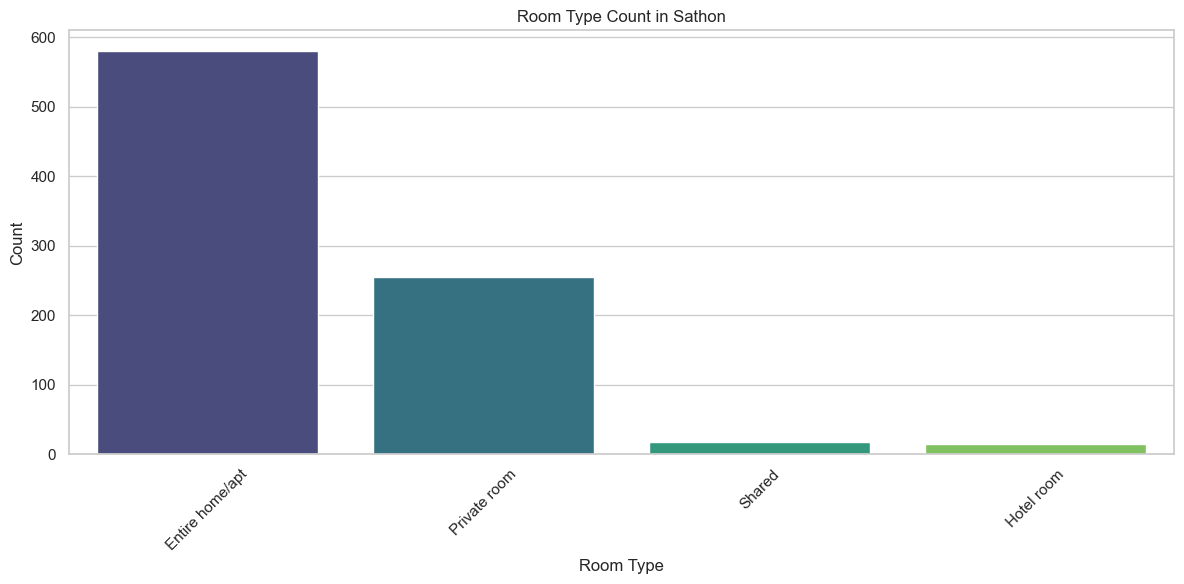

In [216]:
# Visualize the room type count for Sathon
plt.figure(figsize=(12, 6))
sns.barplot(data=room_type_summary_sathon, x='room_type', y='count', palette='viridis')
plt.title('Room Type Count in Sathon')
plt.ylabel('Count')
plt.xlabel('Room Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Grouping each room type into price ranges: Below 500, 500-1000, 1000-2000, 2000-5000, 5000-10000, and above 10000 in Khlong Toei
room_type_price_ranges = df[df['neighbourhood']=='Sathon'].groupby(['room_type', 'price_range']).size().unstack().fillna(0)
room_type_price_ranges

C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_36416\534556591.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  room_type_price_ranges = df[df['neighbourhood']=='Sathon'].groupby(['room_type', 'price_range']).size().unstack().fillna(0)


price_range,< 500 THB,500-1000 THB,1000-2000 THB,2000-5000 THB,5000-10000 THB,>= 10000 THB
room_type,,,,,,
Entire home/apt,2,149,282,115,26,7
Hotel room,1,2,4,6,2,0
Private room,6,105,77,46,15,6
Shared,9,6,2,0,0,1


<Figure size 1200x600 with 0 Axes>

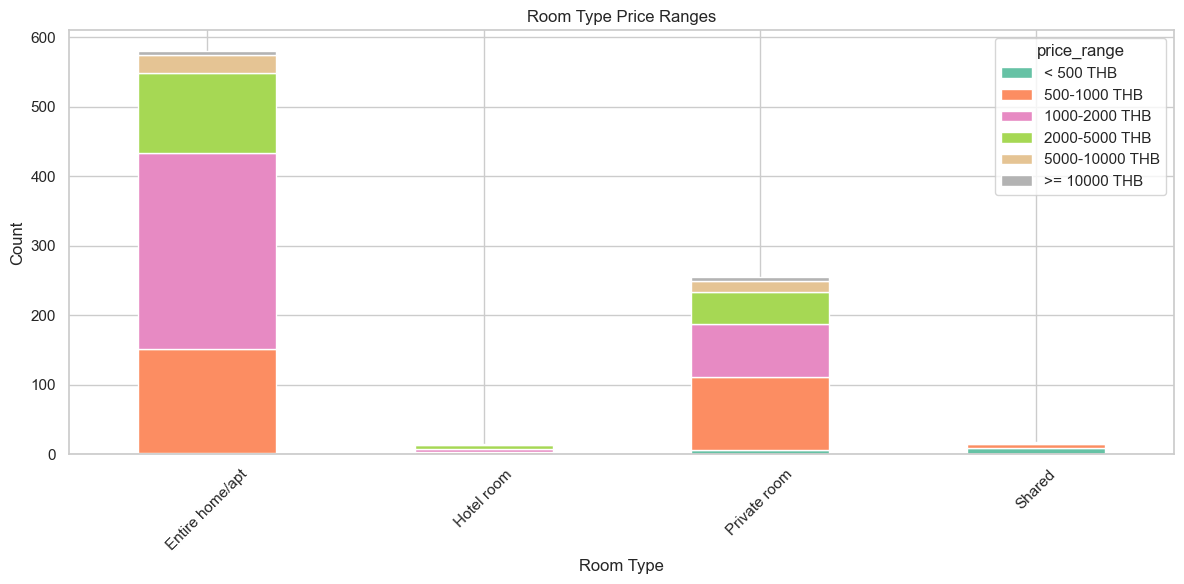

In [ ]:
# Visualize the room type price ranges
plt.figure(figsize=(12, 6))
room_type_price_ranges.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Room Type Price Ranges')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [219]:
# Create a table to show the number of reviews and reviews per month for each room type in Sathon
room_type_reviews = df[df['neighbourhood'] == 'Sathon'].groupby('room_type').agg(
    reviews_sum=('number_of_reviews', 'sum'),
    reviews_mean=('number_of_reviews', 'mean'),
    reviews_median=('number_of_reviews', 'median'),
    reviews_std=('number_of_reviews', 'std'),
    rpm_mean=('reviews_per_month', 'mean'),
    rpm_median=('reviews_per_month', 'median'),
    rpm_std=('reviews_per_month', 'std')
).sort_values(by='reviews_sum', ascending=False).reset_index()
room_type_reviews

,room_type,reviews_sum,reviews_mean,reviews_median,reviews_std,rpm_mean,rpm_median,rpm_std
0,Entire home/apt,20496,35.277108,9.0,69.578217,0.911876,0.620,1.047759
1,Private room,1778,6.972549,0.0,15.769602,0.317686,0.000,0.620882
2,Hotel room,332,22.133333,0.0,53.911126,0.228667,0.000,0.410311
3,Shared,184,10.222222,1.5,21.292240,0.167778,0.035,0.259220


In [230]:
# Create a table to show the number of reviews and reviews per month for each room type and price range in Sathon
room_type_reviews = df[df['neighbourhood'] == 'Sathon'].groupby(['room_type', 'price_range']).agg(
    reviews_sum=('number_of_reviews', 'sum'),
    reviews_mean=('number_of_reviews', 'mean'),
    reviews_median=('number_of_reviews', 'median'),
    reviews_std=('number_of_reviews', 'std'),
    rpm_mean=('reviews_per_month', 'mean'),
    rpm_median=('reviews_per_month', 'median'),
    rpm_std=('reviews_per_month', 'std')
).sort_values(by='reviews_median', ascending=False).reset_index()
room_type_reviews

C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_36416\3901905239.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  room_type_reviews = df[df['neighbourhood'] == 'Sathon'].groupby(['room_type', 'price_range']).agg(


,room_type,price_range,reviews_sum,reviews_mean,reviews_median,reviews_std,rpm_mean,rpm_median,rpm_std
0,Entire home/apt,500-1000 THB,9843,66.060403,23.0,96.871343,1.415034,1.130,1.150418
1,Hotel room,500-1000 THB,32,16.000000,16.0,18.384776,0.345000,0.345,0.403051
2,Entire home/apt,2000-5000 THB,2731,23.747826,8.0,35.279298,0.686261,0.520,0.791219
3,Shared,< 500 THB,181,20.111111,6.0,27.255479,0.261111,0.120,0.279484
4,Entire home/apt,1000-2000 THB,6959,24.677305,4.0,59.583777,0.795674,0.435,1.037095
5,Entire home/apt,5000-10000 THB,905,34.807692,3.5,57.384332,0.548462,0.190,0.660162
6,Private room,500-1000 THB,1380,13.142857,3.0,21.961692,0.455905,0.220,0.642228
7,Hotel room,1000-2000 THB,214,53.500000,3.0,103.022651,0.390000,0.075,0.682398
8,Entire home/apt,< 500 THB,4,2.000000,2.0,2.828427,0.165000,0.165,0.233345
9,Entire home/apt,>= 10000 THB,54,7.714286,2.0,15.691976,0.152857,0.020,0.236130


**Insights:**
1. In Sathon, an **Entire home/apt** with a price range of **500-1000 THB** is most popular. However, entire home/apts in general is well-reviewed regardless of price range.
1. Meanwhile, only mid-range hotel rooms (500-2000 THB) are moderately well-reviewed.
1. Private and shared rooms are not preferrable in the area regardless of the price range.

##### 3. Pom Prap Sattru Phai

Pom Prap Sattru Phai is a suburb in Bangkok. It is a historic district known for landmarks such as Wat Saket (the Golden Mount), Wat Mangkon Kamalawat in Chinatown, and the Ratchadamnoen Boxing Stadium. It blends cultural heritage with vibrant local life (https://en.wikipedia.org/wiki/Pom_Prap_Sattru_Phai_district).

In [160]:
# Create a room type summary table including price median, number of reviews, and reviews per month for Pom Prap Sattru Phai
room_type_summary_pom_prap = df[df['neighbourhood'] == 'Pom Prap Sattru Phai'].groupby('room_type').agg(
    count=('room_type', 'count'),
    count_percentage=('room_type', lambda x: len(x) / len(df[df['neighbourhood'] == 'Pom Prap Sattru Phai']) * 100),
    price_median=('price', 'median'),
    reviews_sum=('number_of_reviews', 'sum'),
    reviews_mean=('number_of_reviews', 'mean'),
    reviews_median=('number_of_reviews', 'median'),
    reviews_std=('number_of_reviews', 'std'),
    rpm_mean=('reviews_per_month', 'mean'),
    rpm_median=('reviews_per_month', 'median'),
    rpm_std=('reviews_per_month', 'std')
).sort_values(by='count', ascending=False).reset_index()
room_type_summary_pom_prap

,room_type,count,count_percentage,price_median,reviews_sum,reviews_mean,reviews_median,reviews_std,rpm_mean,rpm_median,rpm_std
0,Private room,61,46.564885,1851.0,1674,27.442623,2.0,72.796640,0.671475,0.28,1.071562
1,Entire home/apt,54,41.221374,1981.5,2276,42.148148,5.5,75.858957,0.948889,0.45,1.132154
2,Hotel room,11,8.396947,1086.0,240,21.818182,9.0,23.468354,0.376364,0.18,0.386789
3,Shared,5,3.816794,514.0,59,11.800000,6.0,17.612496,0.134000,0.07,0.179527


C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_36416\2197219325.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=room_type_summary_pom_prap, x='room_type', y='count', palette='viridis')


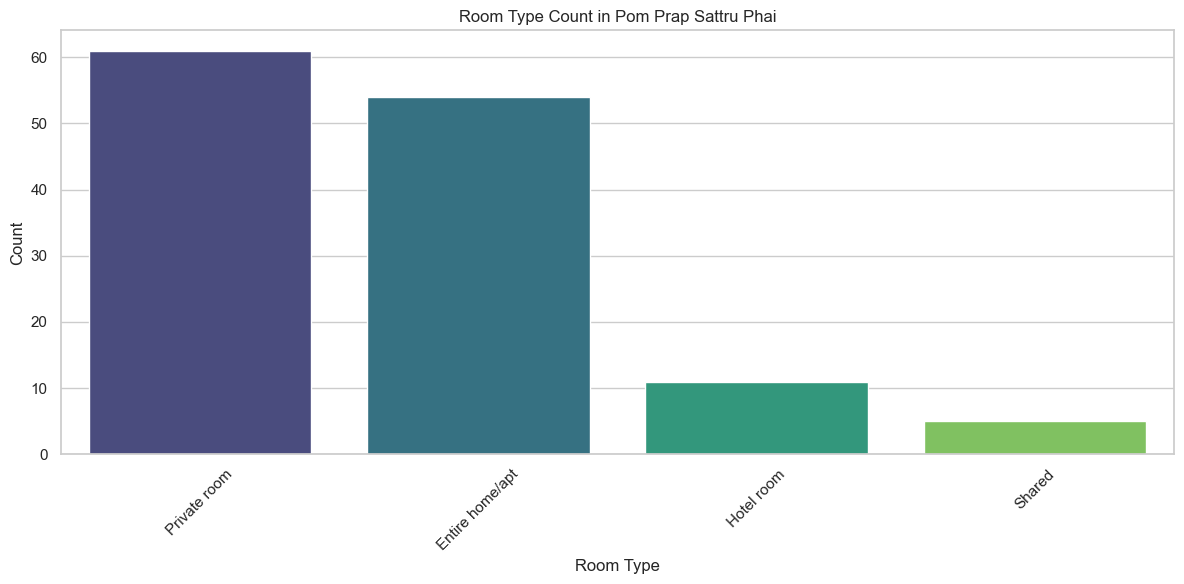

In [161]:
# Visualize the room type count for Pom Prap Sattru Phai
plt.figure(figsize=(12, 6))
sns.barplot(data=room_type_summary_pom_prap, x='room_type', y='count', palette='viridis')
plt.title('Room Type Count in Pom Prap Sattru Phai')
plt.ylabel('Count')
plt.xlabel('Room Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [162]:
# Grouping each room type into price ranges: Below 500, 500-1000, 1000-2000, 2000-5000, 5000-10000, and above 10000 in Khlong Toei
room_type_price_ranges = df[df['neighbourhood']=='Pom Prap Sattru Phai'].groupby(['room_type', 'price_range']).size().unstack().fillna(0)
room_type_price_ranges

C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_36416\255193742.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  room_type_price_ranges = df[df['neighbourhood']=='Pom Prap Sattru Phai'].groupby(['room_type', 'price_range']).size().unstack().fillna(0)


price_range,< 500 THB,500-1000 THB,1000-2000 THB,2000-5000 THB,5000-10000 THB,>= 10000 THB
room_type,,,,,,
Entire home/apt,0,15,12,17,9,1
Hotel room,2,3,5,0,1,0
Private room,0,9,24,19,9,0
Shared,2,2,1,0,0,0


<Figure size 1200x600 with 0 Axes>

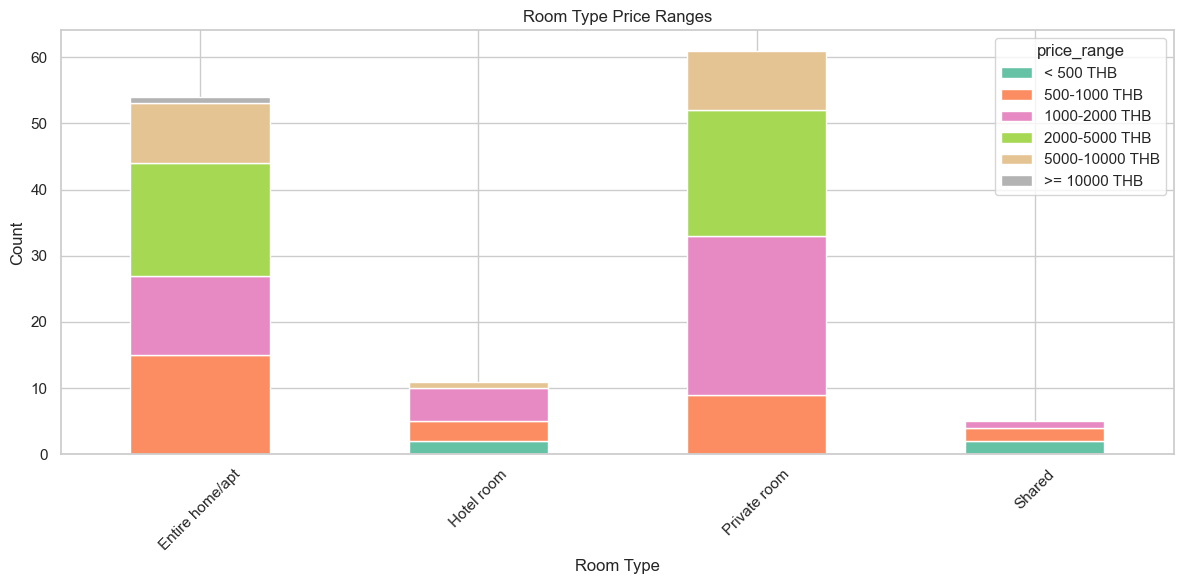

In [163]:
# Visualize the room type price ranges
plt.figure(figsize=(12, 6))
room_type_price_ranges.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Room Type Price Ranges')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [164]:
# Create a table to show the number of reviews and reviews per month for each room type in Khlong Toei
room_type_reviews = df[df['neighbourhood'] == 'Pom Prap Sattru Phai'].groupby('room_type').agg(
    reviews_sum=('number_of_reviews', 'sum'),
    reviews_mean=('number_of_reviews', 'mean'),
    reviews_median=('number_of_reviews', 'median'),
    reviews_std=('number_of_reviews', 'std'),
    rpm_mean=('reviews_per_month', 'mean'),
    rpm_median=('reviews_per_month', 'median'),
    rpm_std=('reviews_per_month', 'std')
).sort_values(by='reviews_sum', ascending=False).reset_index()
room_type_reviews

,room_type,reviews_sum,reviews_mean,reviews_median,reviews_std,rpm_mean,rpm_median,rpm_std
0,Entire home/apt,2276,42.148148,5.5,75.858957,0.948889,0.45,1.132154
1,Private room,1674,27.442623,2.0,72.796640,0.671475,0.28,1.071562
2,Hotel room,240,21.818182,9.0,23.468354,0.376364,0.18,0.386789
3,Shared,59,11.800000,6.0,17.612496,0.134000,0.07,0.179527


In [ ]:
# Create a table to show the number of reviews and reviews per month for each room type and price range in Pom Prap Sattru Phai
room_type_reviews = df[df['neighbourhood'] == 'Pom Prap Sattru Phai'].groupby(['room_type', 'price_range']).agg(
    reviews_sum=('number_of_reviews', 'sum'),
    reviews_mean=('number_of_reviews', 'mean'),
    reviews_median=('number_of_reviews', 'median'),
    reviews_std=('number_of_reviews', 'std'),
    rpm_mean=('reviews_per_month', 'mean'),
    rpm_median=('reviews_per_month', 'median'),
    rpm_std=('reviews_per_month', 'std')
).sort_values(by='reviews_median', ascending=False).reset_index()
room_type_reviews

C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_36416\2319791535.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  room_type_reviews = df[df['neighbourhood'] == 'Pom Prap Sattru Phai'].groupby(['room_type', 'price_range']).agg(


,room_type,price_range,reviews_sum,reviews_mean,reviews_median,reviews_std,rpm_mean,rpm_median,rpm_std
0,Entire home/apt,1000-2000 THB,891,74.250000,44.5,90.381137,1.780000,1.525,1.277021
1,Hotel room,500-1000 THB,113,37.666667,37.0,7.023769,0.613333,0.600,0.110604
2,Entire home/apt,500-1000 THB,1002,66.800000,32.0,89.750607,1.335333,1.100,1.055224
3,Private room,500-1000 THB,398,44.222222,28.0,51.886361,1.041111,0.600,0.913133
4,Shared,500-1000 THB,43,21.500000,21.5,30.405592,0.225000,0.225,0.318198
5,Hotel room,< 500 THB,23,11.500000,11.5,4.949747,0.190000,0.190,0.084853
6,Private room,5000-10000 THB,108,12.000000,9.0,11.842719,0.356667,0.310,0.291333
7,Hotel room,1000-2000 THB,102,20.400000,6.0,31.682803,0.348000,0.100,0.544031
8,Shared,< 500 THB,12,6.000000,6.0,0.000000,0.075000,0.075,0.007071
9,Shared,1000-2000 THB,4,4.000000,4.0,NaN,0.070000,0.070,NaN


**Insights:**
1. Regardless of room type, listings with a price range of **500-1000 THB** are well-reviewed.
1. **Private rooms** are both common and well-reviewed, hence preferrable for business.
1. Shared rooms have higher activity in this area compared to the other areas, particularly those on the lower end of the price range (0-1000 THB), indicating potential.

##### 4. Vadhana (Watthana)

Vadhana is a residential area located next to Khlong Toei, and used to be a part of Khlong Toei. Many expatriates are known to reside in this area (https://en.wikipedia.org/wiki/Watthana_district).

In [170]:
# Create a room type summary table including price median, number of reviews, and reviews per month for Vadhana
room_type_summary_vadhana = df[df['neighbourhood'] == 'Vadhana'].groupby('room_type').agg(
    count=('room_type', 'count'),
    count_percentage=('room_type', lambda x: len(x) / len(df[df['neighbourhood'] == 'Vadhana']) * 100),
    price_median=('price', 'median'),
    reviews_sum=('number_of_reviews', 'sum'),
    reviews_mean=('number_of_reviews', 'mean'),
    reviews_median=('number_of_reviews', 'median'),
    reviews_std=('number_of_reviews', 'std'),
    rpm_mean=('reviews_per_month', 'mean'),
    rpm_median=('reviews_per_month', 'median'),
    rpm_std=('reviews_per_month', 'std')
).sort_values(by='count', ascending=False).reset_index()
room_type_summary_vadhana

,room_type,count,count_percentage,price_median,reviews_sum,reviews_mean,reviews_median,reviews_std,rpm_mean,rpm_median,rpm_std
0,Entire home/apt,1670,68.611339,1888.0,31148,18.651497,4.0,35.182901,0.807928,0.390,1.101348
1,Private room,602,24.732950,1800.0,3371,5.599668,0.0,16.908313,0.349452,0.000,0.916977
2,Hotel room,108,4.437141,2206.5,1184,10.962963,1.0,23.855063,0.204352,0.010,0.439737
3,Shared,54,2.218570,573.0,489,9.055556,1.0,23.794257,0.179444,0.015,0.356442


C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_36416\2091577791.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=room_type_summary_vadhana, x='room_type', y='count', palette='viridis')


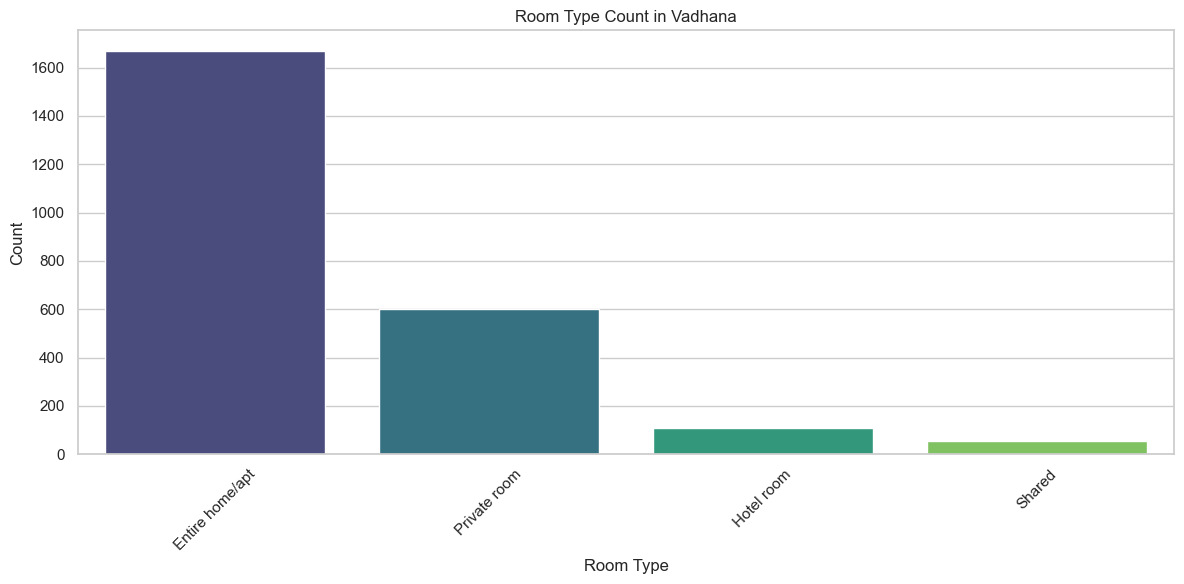

In [171]:
# Visualize the room type count for Vadhana
plt.figure(figsize=(12, 6))
sns.barplot(data=room_type_summary_vadhana, x='room_type', y='count', palette='viridis')
plt.title('Room Type Count in Vadhana')
plt.ylabel('Count')
plt.xlabel('Room Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [172]:
# Grouping each room type into price ranges: Below 500, 500-1000, 1000-2000, 2000-5000, 5000-10000, and above 10000 in Khlong Toei
room_type_price_ranges = df[df['neighbourhood']=='Vadhana'].groupby(['room_type', 'price_range']).size().unstack().fillna(0)
room_type_price_ranges

C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_36416\369532895.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  room_type_price_ranges = df[df['neighbourhood']=='Vadhana'].groupby(['room_type', 'price_range']).size().unstack().fillna(0)


price_range,< 500 THB,500-1000 THB,1000-2000 THB,2000-5000 THB,5000-10000 THB,>= 10000 THB
room_type,,,,,,
Entire home/apt,1,174,711,586,152,46
Hotel room,3,22,24,28,21,10
Private room,14,115,200,183,52,38
Shared,21,22,7,4,0,0


<Figure size 1200x600 with 0 Axes>

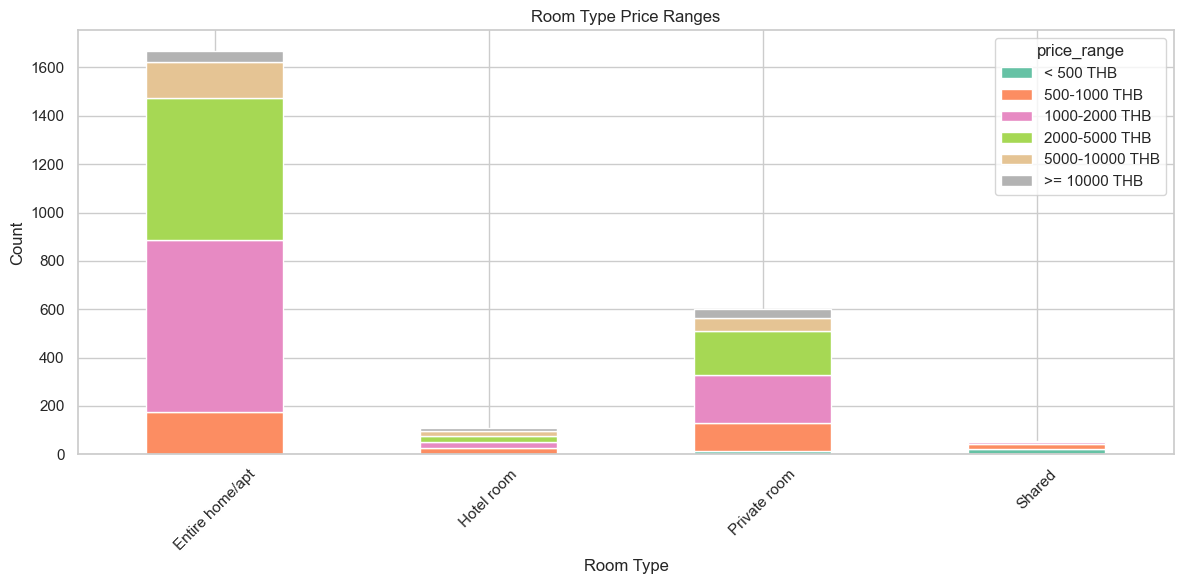

In [173]:
# Visualize the room type price ranges
plt.figure(figsize=(12, 6))
room_type_price_ranges.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Room Type Price Ranges')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [174]:
# Create a table to show the number of reviews and reviews per month for each room type in Khlong Toei
room_type_reviews = df[df['neighbourhood'] == 'Vadhana'].groupby('room_type').agg(
    reviews_sum=('number_of_reviews', 'sum'),
    reviews_mean=('number_of_reviews', 'mean'),
    reviews_median=('number_of_reviews', 'median'),
    reviews_std=('number_of_reviews', 'std'),
    rpm_mean=('reviews_per_month', 'mean'),
    rpm_median=('reviews_per_month', 'median'),
    rpm_std=('reviews_per_month', 'std')
).sort_values(by='reviews_sum', ascending=False).reset_index()
room_type_reviews

,room_type,reviews_sum,reviews_mean,reviews_median,reviews_std,rpm_mean,rpm_median,rpm_std
0,Entire home/apt,31148,18.651497,4.0,35.182901,0.807928,0.390,1.101348
1,Private room,3371,5.599668,0.0,16.908313,0.349452,0.000,0.916977
2,Hotel room,1184,10.962963,1.0,23.855063,0.204352,0.010,0.439737
3,Shared,489,9.055556,1.0,23.794257,0.179444,0.015,0.356442


In [234]:
# Create a table to show the number of reviews and reviews per month for each room type and price range in Vadhana
room_type_reviews = df[df['neighbourhood'] == 'Vadhana'].groupby(['room_type', 'price_range']).agg(
    reviews_sum=('number_of_reviews', 'sum'),
    reviews_mean=('number_of_reviews', 'mean'),
    reviews_median=('number_of_reviews', 'median'),
    reviews_std=('number_of_reviews', 'std'),
    rpm_mean=('reviews_per_month', 'mean'),
    rpm_median=('reviews_per_month', 'median'),
    rpm_std=('reviews_per_month', 'std')
).sort_values(by='reviews_median', ascending=False).reset_index()
room_type_reviews

C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_36416\2524282692.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  room_type_reviews = df[df['neighbourhood'] == 'Vadhana'].groupby(['room_type', 'price_range']).agg(


,room_type,price_range,reviews_sum,reviews_mean,reviews_median,reviews_std,rpm_mean,rpm_median,rpm_std
0,Private room,< 500 THB,169,12.071429,7.5,15.939618,1.949286,0.535,2.500623
1,Hotel room,2000-5000 THB,636,22.714286,7.0,27.717967,0.425357,0.210,0.500374
2,Entire home/apt,< 500 THB,6,6.000000,6.0,NaN,0.440000,0.440,NaN
3,Entire home/apt,1000-2000 THB,15492,21.789030,5.0,39.118173,0.907229,0.580,1.107741
4,Entire home/apt,2000-5000 THB,10617,18.117747,4.5,33.775702,0.847747,0.385,1.132496
5,Shared,< 500 THB,318,15.142857,4.0,34.425696,0.300476,0.080,0.499074
6,Private room,500-1000 THB,1817,15.800000,3.0,30.637438,0.595913,0.160,1.107428
7,Hotel room,< 500 THB,7,2.333333,2.0,2.516611,0.043333,0.040,0.045092
8,Entire home/apt,5000-10000 THB,2203,14.493421,2.0,30.208765,0.643289,0.125,1.034815
9,Entire home/apt,>= 10000 THB,539,11.717391,2.0,19.196832,0.537826,0.190,0.928073


**Insights:**
1. In Vadhana, lower-priced stays are generally more reviewed. However, **mid-to-high range entire home/apts** are more preferrable due to the general popularity of the room type that far surpasses other room types, possibly due to the location being a residential area.
1. Shared rooms are both uncommon and unpopular.

##### 5. Phaya Thai

This district houses several government offices, including the Ministry of Finance and the Ministry of Natural Resources and Environment. The Saphan Khwai area within Phaya Thai is a bustling hub with shops, apartments, and a Big C shopping center, reflecting a blend of administrative functions and residential life (https://en.wikipedia.org/wiki/Phaya_Thai_district?utm_source=chatgpt.com).

In [175]:
# Create a room type summary table including price median, number of reviews, and reviews per month for Phaya Thai
room_type_summary_phaya_thai = df[df['neighbourhood'] == 'Phaya Thai'].groupby('room_type').agg(
    count=('room_type', 'count'),
    count_percentage=('room_type', lambda x: len(x) / len(df[df['neighbourhood'] == 'Phaya Thai']) * 100),
    price_median=('price', 'median'),
    reviews_sum=('number_of_reviews', 'sum'),
    reviews_mean=('number_of_reviews', 'mean'),
    reviews_median=('number_of_reviews', 'median'),
    reviews_std=('number_of_reviews', 'std'),
    rpm_mean=('reviews_per_month', 'mean'),
    rpm_median=('reviews_per_month', 'median'),
    rpm_std=('reviews_per_month', 'std')
).sort_values(by='count', ascending=False).reset_index()
room_type_summary_phaya_thai

,room_type,count,count_percentage,price_median,reviews_sum,reviews_mean,reviews_median,reviews_std,rpm_mean,rpm_median,rpm_std
0,Entire home/apt,195,48.387097,1500.0,10270,52.666667,15.0,116.462846,0.938513,0.410,1.778029
1,Private room,172,42.679901,1377.0,2944,17.116279,2.0,37.458880,0.315523,0.040,0.517888
2,Hotel room,22,5.459057,850.0,610,27.727273,16.5,34.390173,0.390909,0.215,0.456080
3,Shared,14,3.473945,625.0,93,6.642857,0.0,15.775381,0.092143,0.000,0.222406


C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_36416\3449028603.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=room_type_summary_phaya_thai, x='room_type', y='count', palette='viridis')


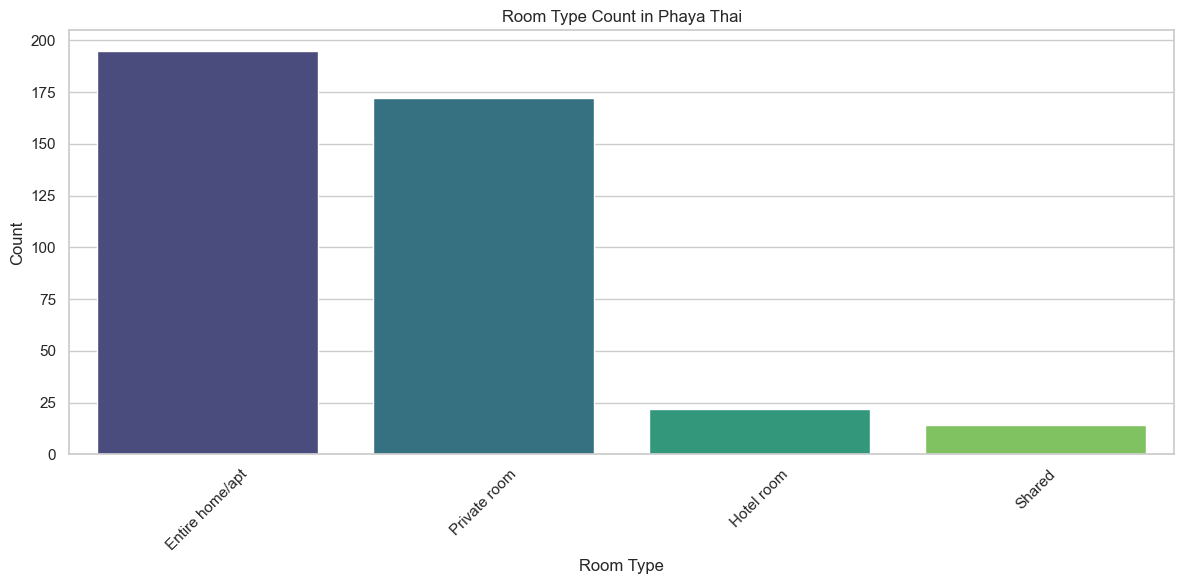

In [176]:
# Visualize the room type count for Phaya Thai
plt.figure(figsize=(12, 6))
sns.barplot(data=room_type_summary_phaya_thai, x='room_type', y='count', palette='viridis')
plt.title('Room Type Count in Phaya Thai')
plt.ylabel('Count')
plt.xlabel('Room Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [177]:
# Grouping each room type into price ranges: Below 500, 500-1000, 1000-2000, 2000-5000, 5000-10000, and above 10000 in Khlong Toei
room_type_price_ranges = df[df['neighbourhood']=='Phaya Thai'].groupby(['room_type', 'price_range']).size().unstack().fillna(0)
room_type_price_ranges

C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_36416\1231092362.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  room_type_price_ranges = df[df['neighbourhood']=='Phaya Thai'].groupby(['room_type', 'price_range']).size().unstack().fillna(0)


price_range,< 500 THB,500-1000 THB,1000-2000 THB,2000-5000 THB,5000-10000 THB,>= 10000 THB
room_type,,,,,,
Entire home/apt,1,34,92,58,9,1
Hotel room,0,14,5,1,1,1
Private room,3,47,68,41,11,2
Shared,6,6,2,0,0,0


<Figure size 1200x600 with 0 Axes>

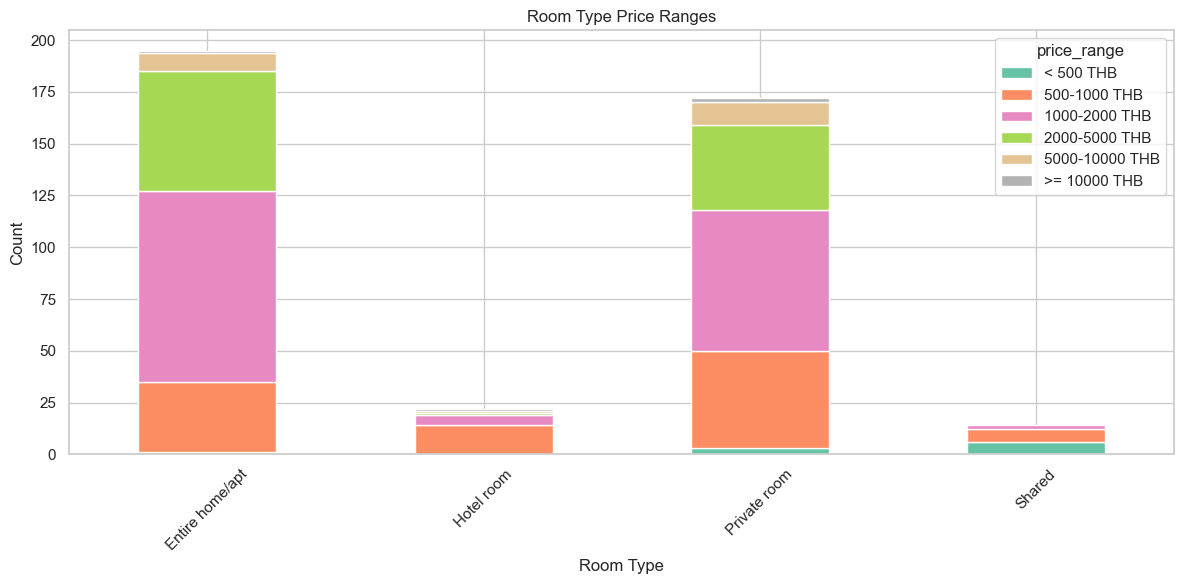

In [178]:
# Visualize the room type price ranges
plt.figure(figsize=(12, 6))
room_type_price_ranges.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Room Type Price Ranges')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [179]:
# Create a table to show the number of reviews and reviews per month for each room type in Khlong Toei
room_type_reviews = df[df['neighbourhood'] == 'Phaya Thai'].groupby('room_type').agg(
    reviews_sum=('number_of_reviews', 'sum'),
    reviews_mean=('number_of_reviews', 'mean'),
    reviews_median=('number_of_reviews', 'median'),
    reviews_std=('number_of_reviews', 'std'),
    rpm_mean=('reviews_per_month', 'mean'),
    rpm_median=('reviews_per_month', 'median'),
    rpm_std=('reviews_per_month', 'std')
).sort_values(by='reviews_sum', ascending=False).reset_index()
room_type_reviews

,room_type,reviews_sum,reviews_mean,reviews_median,reviews_std,rpm_mean,rpm_median,rpm_std
0,Entire home/apt,10270,52.666667,15.0,116.462846,0.938513,0.410,1.778029
1,Private room,2944,17.116279,2.0,37.458880,0.315523,0.040,0.517888
2,Hotel room,610,27.727273,16.5,34.390173,0.390909,0.215,0.456080
3,Shared,93,6.642857,0.0,15.775381,0.092143,0.000,0.222406


In [235]:
# Create a table to show the number of reviews and reviews per month for each room type and price range in Phaya Thai
room_type_reviews = df[df['neighbourhood'] == 'Phaya Thai'].groupby(['room_type', 'price_range']).agg(
    reviews_sum=('number_of_reviews', 'sum'),
    reviews_mean=('number_of_reviews', 'mean'),
    reviews_median=('number_of_reviews', 'median'),
    reviews_std=('number_of_reviews', 'std'),
    rpm_mean=('reviews_per_month', 'mean'),
    rpm_median=('reviews_per_month', 'median'),
    rpm_std=('reviews_per_month', 'std')
).sort_values(by='reviews_median', ascending=False).reset_index()
room_type_reviews

C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_36416\1620149597.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  room_type_reviews = df[df['neighbourhood'] == 'Phaya Thai'].groupby(['room_type', 'price_range']).agg(


,room_type,price_range,reviews_sum,reviews_mean,reviews_median,reviews_std,rpm_mean,rpm_median,rpm_std
0,Entire home/apt,1000-2000 THB,6506,70.717391,34.0,152.894227,1.260870,0.805,2.356241
1,Hotel room,500-1000 THB,548,39.142857,26.0,38.137115,0.552143,0.425,0.495117
2,Entire home/apt,500-1000 THB,1864,54.823529,14.0,81.976889,0.748529,0.345,0.919767
3,Private room,500-1000 THB,1380,29.361702,9.0,39.899017,0.517660,0.220,0.598023
4,Private room,< 500 THB,41,13.666667,8.0,17.214335,0.436667,0.580,0.385530
5,Hotel room,1000-2000 THB,60,12.000000,5.0,12.922848,0.168000,0.070,0.182401
6,Entire home/apt,2000-5000 THB,1688,29.103448,4.5,57.263530,0.620517,0.115,0.993944
7,Entire home/apt,5000-10000 THB,212,23.555556,4.0,49.842530,0.618889,0.440,0.752221
8,Shared,< 500 THB,89,14.833333,3.5,22.435834,0.205000,0.055,0.318167
9,Hotel room,5000-10000 THB,2,2.000000,2.0,NaN,0.030000,0.030,NaN


**Insights:**
1. People in Phaya Thai are looking for more low-to-mid range stays **(500-2000 THB)**.
1. Within this range, **Entire home/apts** have slightly higher review activity on the higher end of the price range compared to **private rooms**, but both room types are well-sought after.
1. Shared rooms are both uncommon and unpopular.

### 7. Statistical Analysis

The goal of the statistical analysis is to determine whether other attributes in the dataset play a part in determining the popularity of a listing. This is to complete our analysis and make sure that we do not miss any recommendation.

#### Descriptive Statistics

In [180]:
summary_stats = df[['price', 'reviews_per_month', 'availability_365', 'minimum_nights']].describe()
print(summary_stats) 

                price  reviews_per_month  availability_365  minimum_nights
count    16981.000000       16981.000000      16981.000000    16981.000000
mean      2737.403686           0.573403        254.897827       12.969319
std      16715.217264           1.038588        122.425969       41.032402
min        278.000000           0.000000          0.000000        1.000000
25%        900.000000           0.000000        157.000000        1.000000
50%       1389.000000           0.120000        329.000000        1.000000
75%       2250.000000           0.760000        364.000000        7.000000
max    1000000.000000          20.580000        365.000000     1115.000000


In [181]:
# Create a new column to categorize listing based on reviews_per_month: 0.0 (No reviews), 0.1 - 1.0 (Low), 1.0 - 5.0 (Medium), 5.0 - 10.0 (High), and above 10.0 (Very High)
df['rpm_category'] = pd.cut(df['reviews_per_month'], bins=[-1, 0, 1, 5, 10, float('inf')], labels=['No Reviews', 'Low', 'Medium', 'High', 'Very High'])
df['rpm_category'].value_counts().sort_index()

rpm_category
No Reviews    6182
Low           7720
Medium        2951
High           118
Very High       10
Name: count, dtype: int64

In [182]:
# Ensure rpm_category has an ordinal order
rpm_order = ['No Reviews', 'Low', 'Medium', 'High', 'Very High']
df['rpm_category'] = pd.Categorical(df['rpm_category'], categories=rpm_order, ordered=True)

# Convert rpm_category to numeric for correlation
df['rpm_category_code'] = df['rpm_category'].cat.codes

In [183]:
# Spearman correlation (best for ordinal data)
corr, p_value = spearmanr(df['price'], df['rpm_category_code'])
print(f'Spearman correlation: {corr:.3f}, p-value: {p_value:.3f}')

Spearman correlation: -0.042, p-value: 0.000


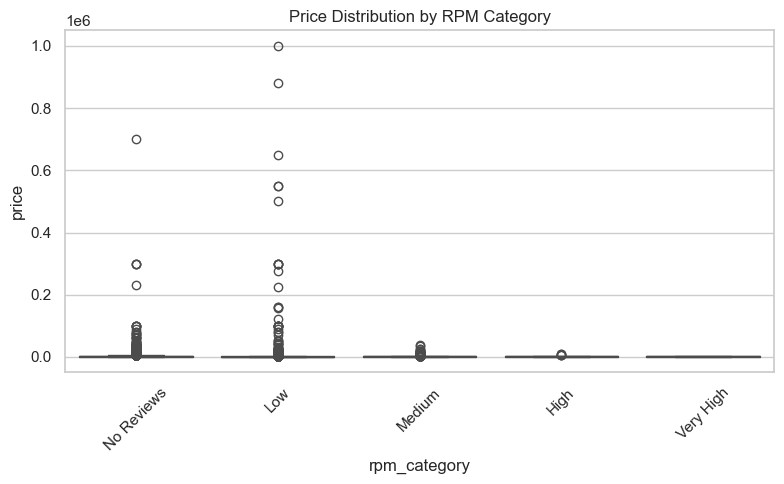

In [184]:
# Visualization: Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='rpm_category', y='price', data=df, order=rpm_order)
plt.title('Price Distribution by RPM Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

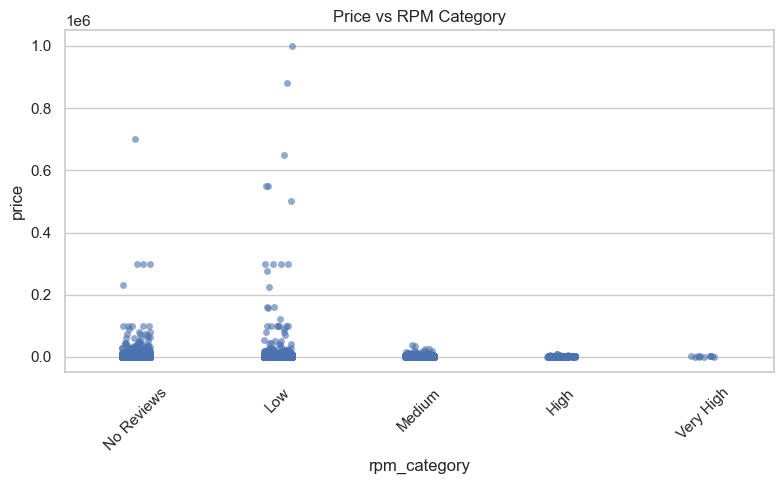

In [185]:
# Visualization: Scatterplot with jitter
plt.figure(figsize=(8, 5))
sns.stripplot(x='rpm_category', y='price', data=df, order=rpm_order, jitter=True, alpha=0.6)
plt.title('Price vs RPM Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**<br>
Higher priced listings tend to has none to low review activity. Cheaper accommodations are more reviewed.

**Insights:**
1. The variables are mostly independent
1. Listings with a higher minimum nights tend to get less reviews. Since reviews directly correlate with popularity, this shows that people are less willing to rent if the minimum night requirement is high.

#### Inferential Statistics

In [187]:
# ANOVA: Do reviews per month significantly vary by neighborhood?
top_neigh_reviews = df.groupby("neighbourhood")["reviews_per_month"].mean().sort_values(ascending=False).head(10)
anova_result = stats.f_oneway(*(df[df["neighbourhood"] == n]["reviews_per_month"].dropna() for n in top_neigh_reviews.index))
print("ANOVA p-value (reviews per month by neighborhood):", anova_result.pvalue)

ANOVA p-value (reviews per month by neighborhood): 5.886847507233193e-21


**Insight:**<br>
Reviews per month does not significantly vary by neighourhood.

In [188]:
# ANOVA: Does price significantly vary by neighborhood?
top_neigh_price = df.groupby("neighbourhood")["price"].mean().sort_values(ascending=False).head(10)
anova_price_result = stats.f_oneway(*(df[df["neighbourhood"] == n]["price"].dropna() for n in top_neigh_price.index))
print("ANOVA p-value (price by neighborhood):", anova_price_result.pvalue)

ANOVA p-value (price by neighborhood): 0.00036873519521913174


**Insight:**<br>
Price significantly varies by neighbourhood.

In [189]:
# Does minimum nights affect reviews per month?

# Select relevant columns
df_clean = df[['minimum_nights', 'reviews_per_month']]

# Categorize stays based on minimum_nights
def categorize_stay(nights):
    if nights <= 3:
        return 'Short Stay'
    elif nights <= 30:
        return 'Medium Stay'
    else:
        return 'Long Stay'

df_clean['stay_category'] = df_clean['minimum_nights'].apply(categorize_stay)

C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_36416\1530786723.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['stay_category'] = df_clean['minimum_nights'].apply(categorize_stay)


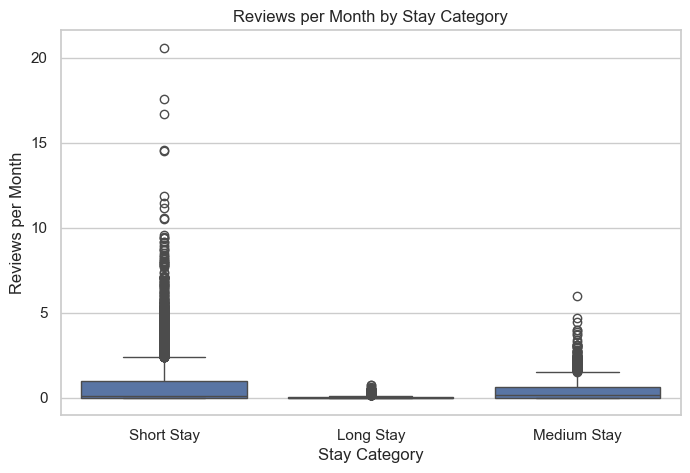

In [190]:
# Visualize Reviews per Month across Stay Categories
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x='stay_category', y='reviews_per_month')
plt.title('Reviews per Month by Stay Category')
plt.xlabel('Stay Category')
plt.ylabel('Reviews per Month')
plt.show()

In [191]:
from scipy.stats import kruskal

# Kruskal-Wallis Test (non-parametric test for comparing more than 2 groups)
groups = [group['reviews_per_month'].values for name, group in df_clean.groupby('stay_category')]
kruskal_stat, kruskal_p = kruskal(*groups)

print("Kruskal-Wallis H-statistic:", kruskal_stat)
print("p-value:", kruskal_p)

Kruskal-Wallis H-statistic: 378.8317406454131
p-value: 5.466794312840187e-83


In [192]:
# Interpret the result

if kruskal_p < 0.05:
    print("There is a statistically significant difference in reviews_per_month between stay categories.")
    print("Specifically, Short Stay listings (1-3 nights) tend to have the highest review frequency,")
    print("while Long Stay listings (>30 nights) receive the lowest reviews per month.")
else:
    print("There is no statistically significant difference in reviews_per_month between stay categories.")

There is a statistically significant difference in reviews_per_month between stay categories.
Specifically, Short Stay listings (1-3 nights) tend to have the highest review frequency,
while Long Stay listings (>30 nights) receive the lowest reviews per month.


**Insights:**<br>
1. Minimum stay requirement DOES impact the number of reviews per month in Bangkok Airbnb listings.
1. Shorter minimum stay tends to drive higher review activity from guests.

In [193]:
# Split the data
khlong_toei_reviews = df[df['neighbourhood'] == 'Khlong Toei']['reviews_per_month'].dropna()
other_reviews = df[df['neighbourhood'] != 'Khlong Toei']['reviews_per_month'].dropna()

# Welch's t-test (unequal variances), one-sided: Khlong Toei > others
t_stat, p_value = stats.ttest_ind(khlong_toei_reviews, other_reviews, equal_var=False, alternative='greater')

# Print result
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H₀: Listings in Khlong Toei are significantly more reviewed.")
else:
    print("Fail to reject H₀: No significant evidence that Khlong Toei listings are more reviewed.")

T-statistic: 14.5183
P-value: 0.0000
Reject H₀: Listings in Khlong Toei are significantly more reviewed.


**Insight:**
<br>Our recommendation from EDA was proven correct as Khlong Toei listings are indeed more reviewed.

**Conclusion:**
<br> We further add a recommendation that the minimum stay should be between 1-3 nights to drive more activity and increase popularity.

### 8. Overall Conclusion

From our analysis, we made the following recommendations:
1. Depending on the investment budget, the ideal room type in general is **Entire home/apartment**.
1. **Khlong Toei** remains the best area to start an Airbnb because it has the highest activity (Airbnb businesses and customer reviews) due to its tourist spots. In this area, a price range of **2000-5000 THB** per night is optimal.

### 9. Additional Information

As an additional information, we would like to include a statistics on how profitable Airbnbs in Bangkok are from a dataset from the year 2019-2023.

In [194]:
# Read the tourism dataset
df_tourism = pd.read_csv("thailand-tourism-2019-2023.csv")
df_tourism.head()

,date,province_thai,province_eng,region_thai,region_eng,variable,value
0,2019-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,occupancy_rate,93.37
1,2019-01-01,ลพบุรี,Lopburi,ภาคกลาง,central,occupancy_rate,61.32
2,2019-01-01,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,ภาคกลาง,central,occupancy_rate,73.37
3,2019-01-01,สระบุรี,Saraburi,ภาคกลาง,central,occupancy_rate,67.33
4,2019-01-01,ชัยนาท,Chainat,ภาคกลาง,central,occupancy_rate,79.31


In [195]:
# Get the general information of the dataset
df_tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30800 entries, 0 to 30799
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30800 non-null  object 
 1   province_thai  30800 non-null  object 
 2   province_eng   30800 non-null  object 
 3   region_thai    30800 non-null  object 
 4   region_eng     30800 non-null  object 
 5   variable       30800 non-null  object 
 6   value          30800 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.6+ MB


In [196]:
# Convert the 'date' column to datetime format
df_tourism['date'] = pd.to_datetime(df_tourism['date'])

In [197]:
# Recheck the data type of the 'date' column
print(f"Now, the data type of the 'date' column has become {df_tourism['date'].dtype}.")

Now, the data type of the 'date' column has become datetime64[ns].


In [198]:
# Filter the dataset to only include Bangkok
df_tourism_bangkok = df_tourism[df_tourism['province_eng'] == 'Bangkok']
df_tourism_bangkok.reset_index(drop=True, inplace=True)
df_tourism_bangkok.head(), df_tourism_bangkok.tail()

(        date  province_thai province_eng region_thai region_eng  \
 0 2019-01-01  กรุงเทพมหานคร      Bangkok     ภาคกลาง    central   
 1 2020-01-01  กรุงเทพมหานคร      Bangkok     ภาคกลาง    central   
 2 2021-01-01  กรุงเทพมหานคร      Bangkok     ภาคกลาง    central   
 3 2022-01-01  กรุงเทพมหานคร      Bangkok     ภาคกลาง    central   
 4 2023-01-01  กรุงเทพมหานคร      Bangkok     ภาคกลาง    central   
 
          variable  value  
 0  occupancy_rate  93.37  
 1  occupancy_rate  89.36  
 2  occupancy_rate   7.54  
 3  occupancy_rate  26.34  
 4  occupancy_rate  75.02  ,
           date  province_thai province_eng region_thai region_eng  \
 395 2022-11-01  กรุงเทพมหานคร      Bangkok     ภาคกลาง    central   
 396 2019-12-01  กรุงเทพมหานคร      Bangkok     ภาคกลาง    central   
 397 2020-12-01  กรุงเทพมหานคร      Bangkok     ภาคกลาง    central   
 398 2021-12-01  กรุงเทพมหานคร      Bangkok     ภาคกลาง    central   
 399 2022-12-01  กรุงเทพมหานคร      Bangkok     ภาคกลาง    central   
 

In [199]:
# Get the unique values of the 'variable' column
df_tourism_bangkok['variable'].unique()

array(['occupancy_rate', 'no_tourist_occupied', 'no_tourist_all',
       'no_tourist_thai', 'no_tourist_foreign', 'net_profit_all',
       'net_profit_thai', 'net_profit_foreign'], dtype=object)

We can see that the `variable` column includes information such as occupancy rate, number of tourist occupancy for both Thai and foreign tourists, and net profit for both Thai and foreign tourists. We would next convert these into separate columns.

In [200]:
# Pivot the variable column to create separate columns for each variable
df_tourism_bangkok_pivot = df_tourism_bangkok.pivot(index=['date', 'province_thai', 'province_eng', 'region_thai', 'region_eng'], columns='variable', values='value').reset_index()
df_tourism_bangkok_pivot.head()

variable,date,province_thai,province_eng,region_thai,region_eng,net_profit_all,net_profit_foreign,net_profit_thai,no_tourist_all,no_tourist_foreign,no_tourist_occupied,no_tourist_thai,occupancy_rate
0,2019-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,81926.49,52183.91,29742.58,5959075.0,2425014.0,3334971.0,3534061.0,93.37
1,2019-02-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,73884.43,49310.43,24574.00,5211404.0,2291482.0,3025538.0,2919922.0,89.19
2,2019-03-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,70994.13,44928.07,26066.06,5185040.0,2087831.0,2887616.0,3097209.0,84.40
3,2019-04-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,88785.90,56857.17,31928.73,5668049.0,2322310.0,3239883.0,3345739.0,87.91
4,2019-05-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,81195.51,48942.51,32253.00,5378757.0,1999039.0,2955553.0,3379718.0,79.44


In [201]:
# Check for null values in the dataset
df_tourism_bangkok_pivot.isnull().sum()

variable
date                   0
province_thai          0
province_eng           0
region_thai            0
region_eng             0
net_profit_all         0
net_profit_foreign     0
net_profit_thai        0
no_tourist_all         0
no_tourist_foreign     0
no_tourist_occupied    0
no_tourist_thai        0
occupancy_rate         0
dtype: int64

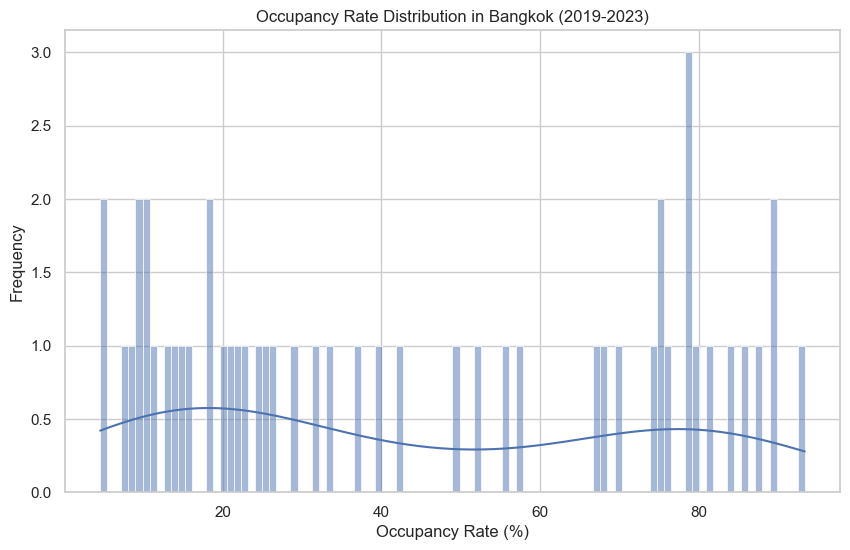

In [202]:
# Get the overall occupancy rate, number of tourists, and net profit in Bangkok from 2019-2023
# First, check the distribution of the 'occupancy_rate' column
plt.figure(figsize=(10, 6))
sns.histplot(df_tourism_bangkok_pivot['occupancy_rate'], bins=100, kde=True)
plt.title('Occupancy Rate Distribution in Bangkok (2019-2023)')
plt.xlabel('Occupancy Rate (%)')
plt.ylabel('Frequency')
plt.show()

In [203]:
# Check the skewness and kurtosis of the 'occupancy_rate' column
print("Kurtosis: ", df_tourism_bangkok_pivot['occupancy_rate'].kurt())
print("Skewness: ", df_tourism_bangkok_pivot['occupancy_rate'].skew())

Kurtosis:  -1.5677464450461107
Skewness:  0.2521790919827893


**Insights:**
1. Occupancy rate data in 2023 is only slightly right-skewed.
1. Mean should be used for the central tendency calculation.

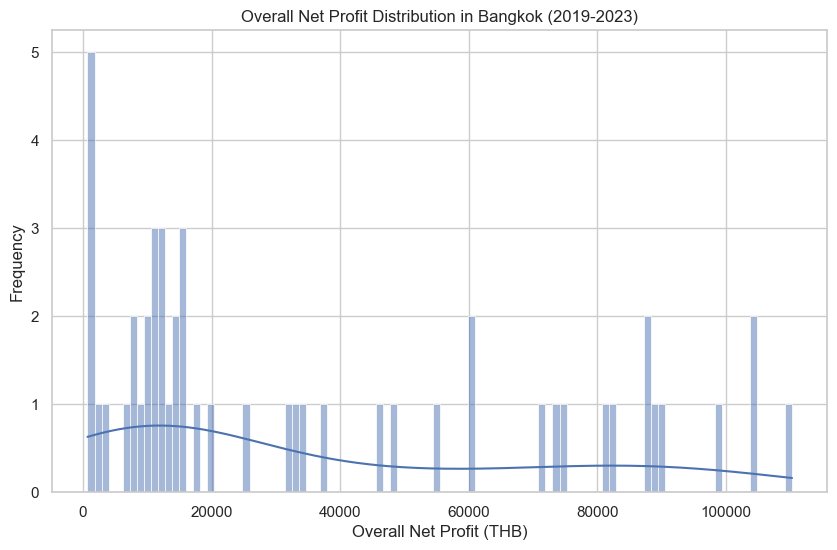

In [204]:
# Then, check the distribution of the 'net_profit_all' column
plt.figure(figsize=(10, 6))
sns.histplot(df_tourism_bangkok_pivot['net_profit_all'], bins=100, kde=True)
plt.title('Overall Net Profit Distribution in Bangkok (2019-2023)')
plt.xlabel('Overall Net Profit (THB)')
plt.ylabel('Frequency')
plt.show()

In [205]:
# Check the skewness and kurtosis of the 'net_profit_all' column
print("Kurtosis: ", df_tourism_bangkok_pivot['net_profit_all'].kurt())
print("Skewness: ", df_tourism_bangkok_pivot['net_profit_all'].skew())

Kurtosis:  -0.9246035266443267
Skewness:  0.7633729803472963


**Insights:**
1. Net profit data in 2023 is only moderately right-skewed.
1. Mean should be used for the central tendency calculation.

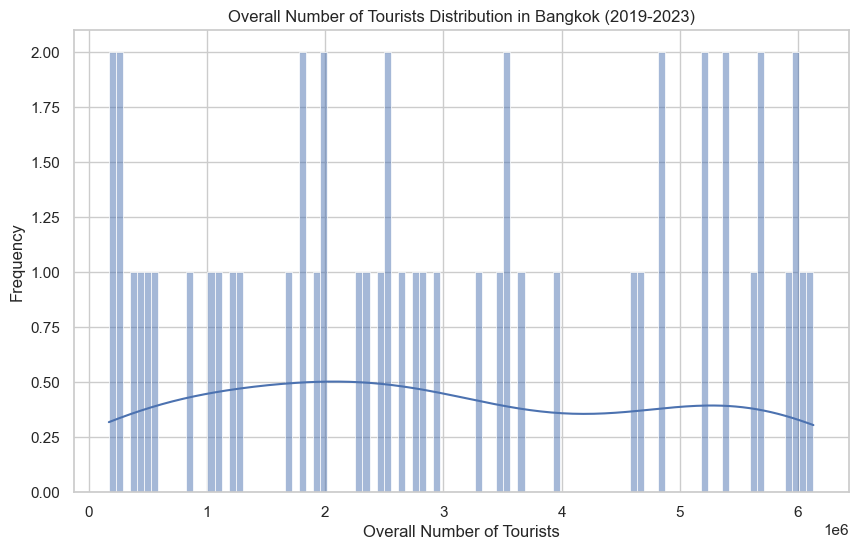

In [206]:
# Then, check the distribution of the 'no_tourist_all' column
plt.figure(figsize=(10, 6))
sns.histplot(df_tourism_bangkok_pivot['no_tourist_all'], bins=100, kde=True)
plt.title('Overall Number of Tourists Distribution in Bangkok (2019-2023)')
plt.xlabel('Overall Number of Tourists')
plt.ylabel('Frequency')
plt.show()

In [207]:
# Check the skewness and kurtosis of the 'no_tourist_all' column
print("Kurtosis: ", df_tourism_bangkok_pivot['no_tourist_all'].kurt())
print("Skewness: ", df_tourism_bangkok_pivot['no_tourist_all'].skew())

Kurtosis:  -1.3008655303300527
Skewness:  0.15101530043964984


**Insights:**
1. Net profit data in 2023 is normally distributed.
1. Mean should be used for the central tendency calculation.

Now, let's summarize the overall value of these 3 variables.

In [208]:
print(f"The overall occupancy rate in Bangkok from 2019-2023 is {df_tourism_bangkok_pivot['occupancy_rate'].mean():.2f}%.")
print(f"The overall number of tourists in Bangkok from 2019-2023 is {df_tourism_bangkok_pivot['no_tourist_all'].sum():,.0f} people.")
print(f"The overall net profit in Bangkok from 2019-2023 is {df_tourism_bangkok_pivot['net_profit_all'].sum():,.0f} THB.")

The overall occupancy rate in Bangkok from 2019-2023 is 43.83%.
The overall number of tourists in Bangkok from 2019-2023 is 151,352,500 people.
The overall net profit in Bangkok from 2019-2023 is 1,846,967 THB.


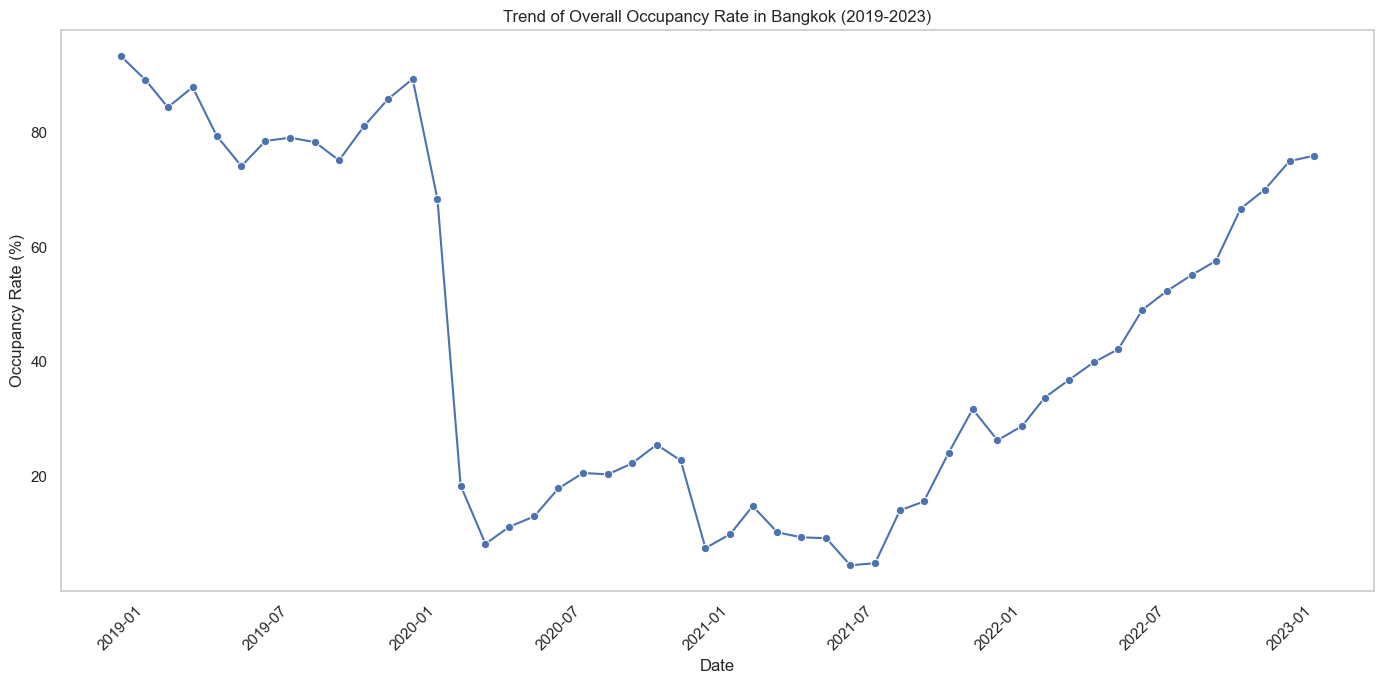

In [209]:
# Visualize the trend of the overall occupancy rate in Bangkok from 2019-2023
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_tourism_bangkok_pivot, x='date', y='occupancy_rate', marker='o')
plt.title('Trend of Overall Occupancy Rate in Bangkok (2019-2023)')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

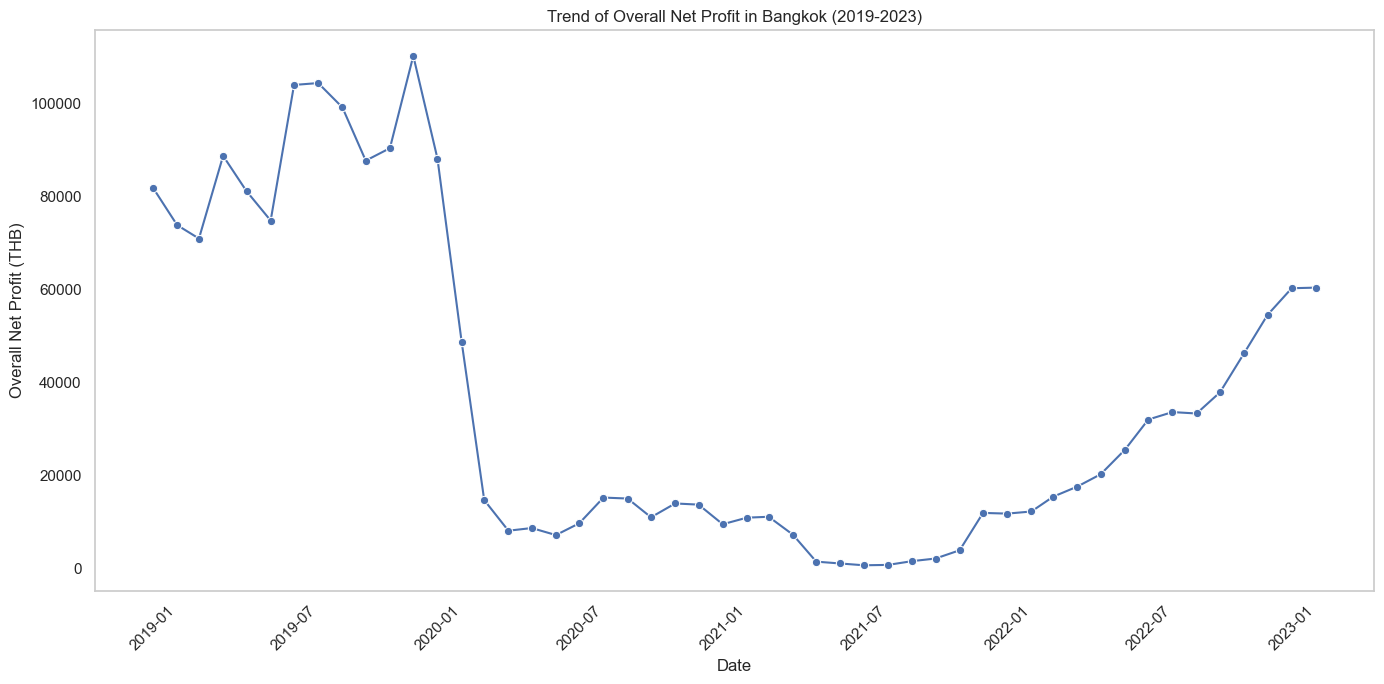

In [210]:
# Visualize the trend of the overall net profit in Bangkok from 2019-2023
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_tourism_bangkok_pivot, x='date', y='net_profit_all', marker='o')
plt.title('Trend of Overall Net Profit in Bangkok (2019-2023)')
plt.xlabel('Date')
plt.ylabel('Overall Net Profit (THB)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

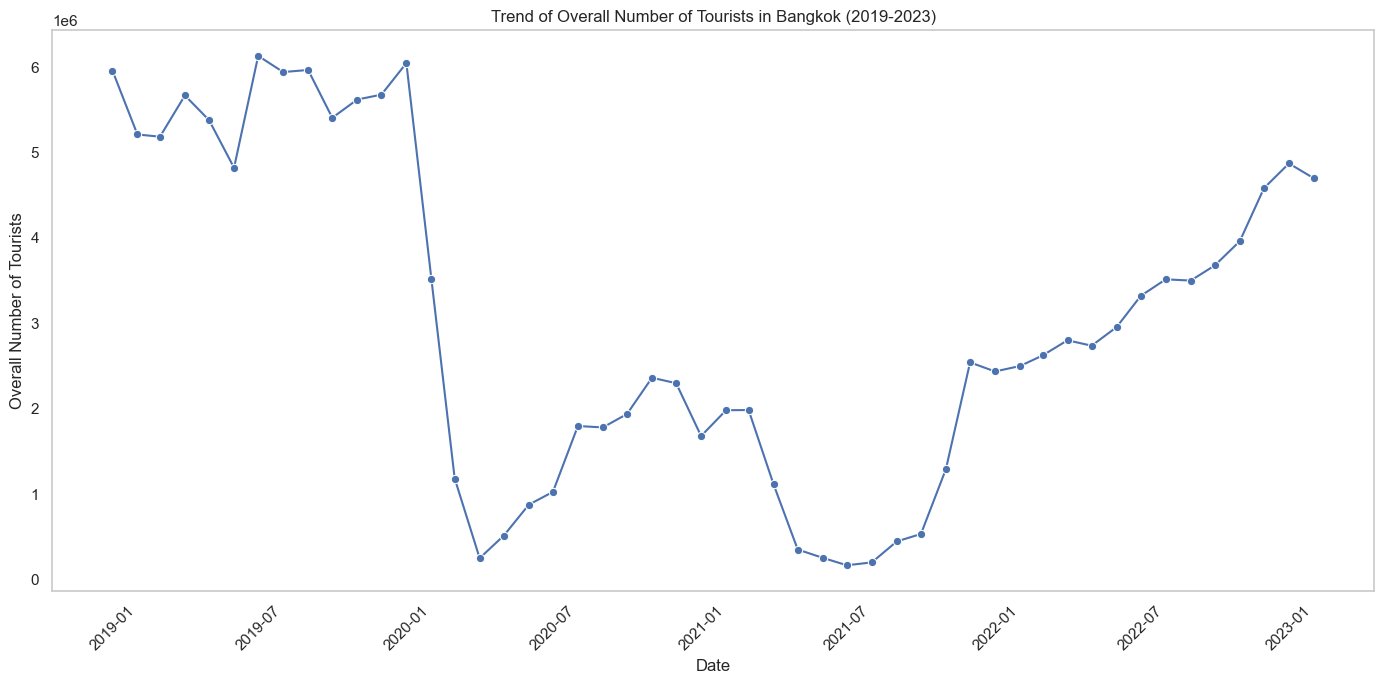

In [211]:
# Visualize the trend of the overall number of tourists in Bangkok from 2019-2023
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_tourism_bangkok_pivot, x='date', y='no_tourist_all', marker='o')
plt.title('Trend of Overall Number of Tourists in Bangkok (2019-2023)')
plt.xlabel('Date')
plt.ylabel('Overall Number of Tourists')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()